What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [194]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
debug = 1 #set to 1 to see each step set to 0 to run fast

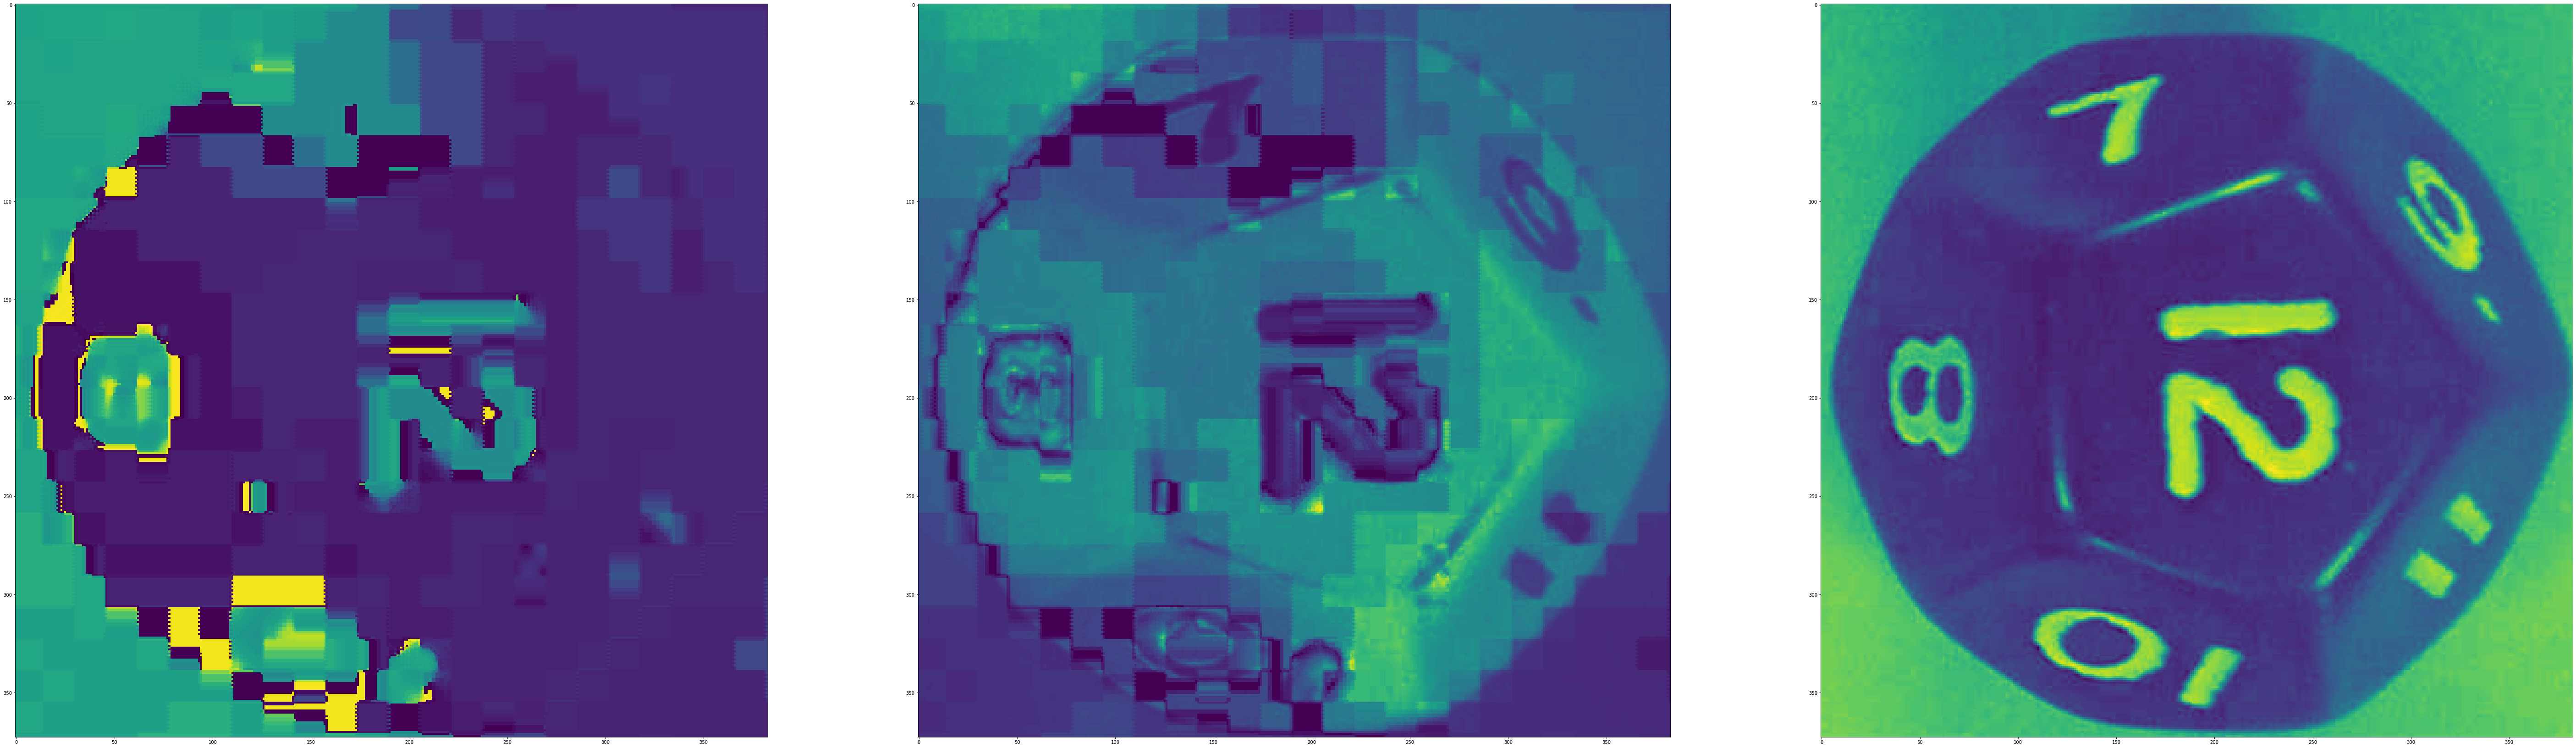

In [195]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieHSV = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2HSV)
dieGreyH,dieGreyS,dieGreyV = cv2.split(dieHSV)
void = 0
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,3,1),plt.imshow(dieGreyH)
    plt.subplot(1,3,2),plt.imshow(dieGreyS)
    plt.subplot(1,3,3),plt.imshow(dieGreyV)

# step 1 find the center of the screen

In [196]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)
    
def distBettweenPoints(x1,y1,x2,y2):
    distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return distance

In [197]:
#h, w = dieGray.shape
#midY, midX = h/2, w/2
#displayCenterOfImage(dieGray)
#dieGrayEqual = cv2.equalizeHist(dieGray)


# step 2 find the two nearest conturs to the center

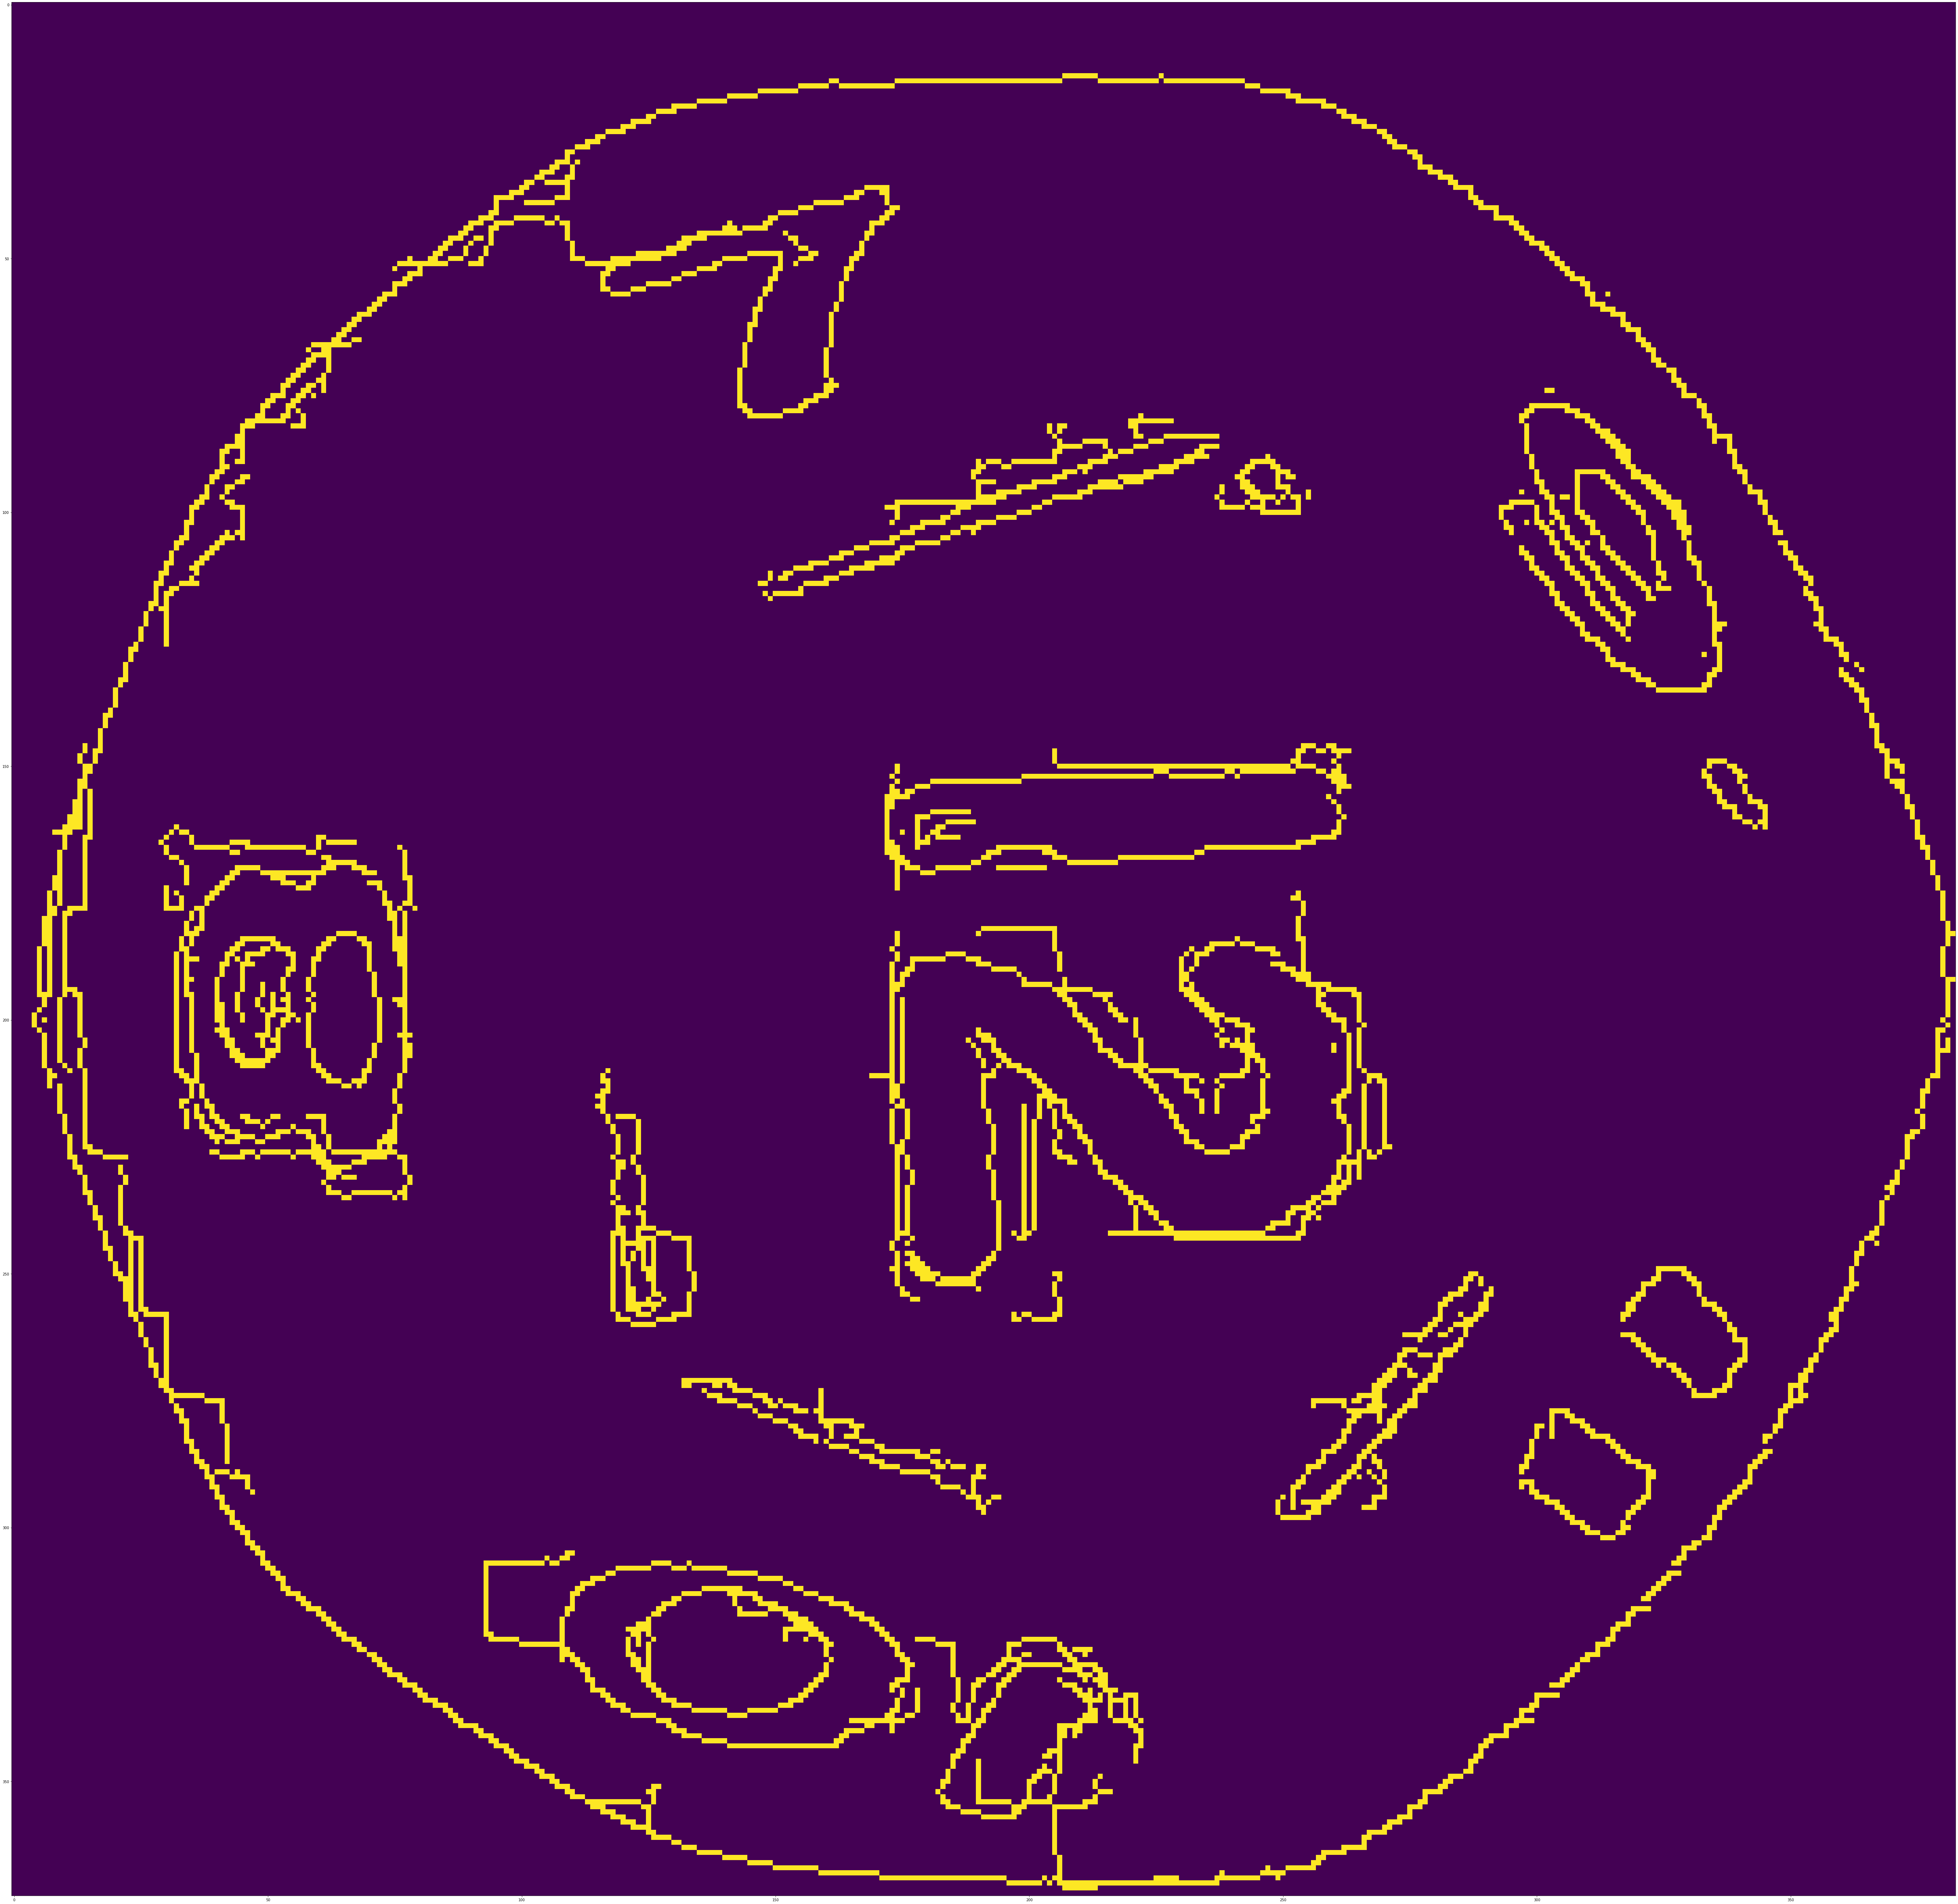

In [198]:
#MAGIC threshoulding stuff
#thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
#threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
#dieBlured = cv2.medianBlur(dieGray, 9)
cannyedS = cv2.Canny(dieGreyS,50,110)
cannyedV = cv2.Canny(dieGreyV,25,110)
cannyed = cv2.bitwise_or(cannyedV, cannyedS)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(cannyed)

 clean up

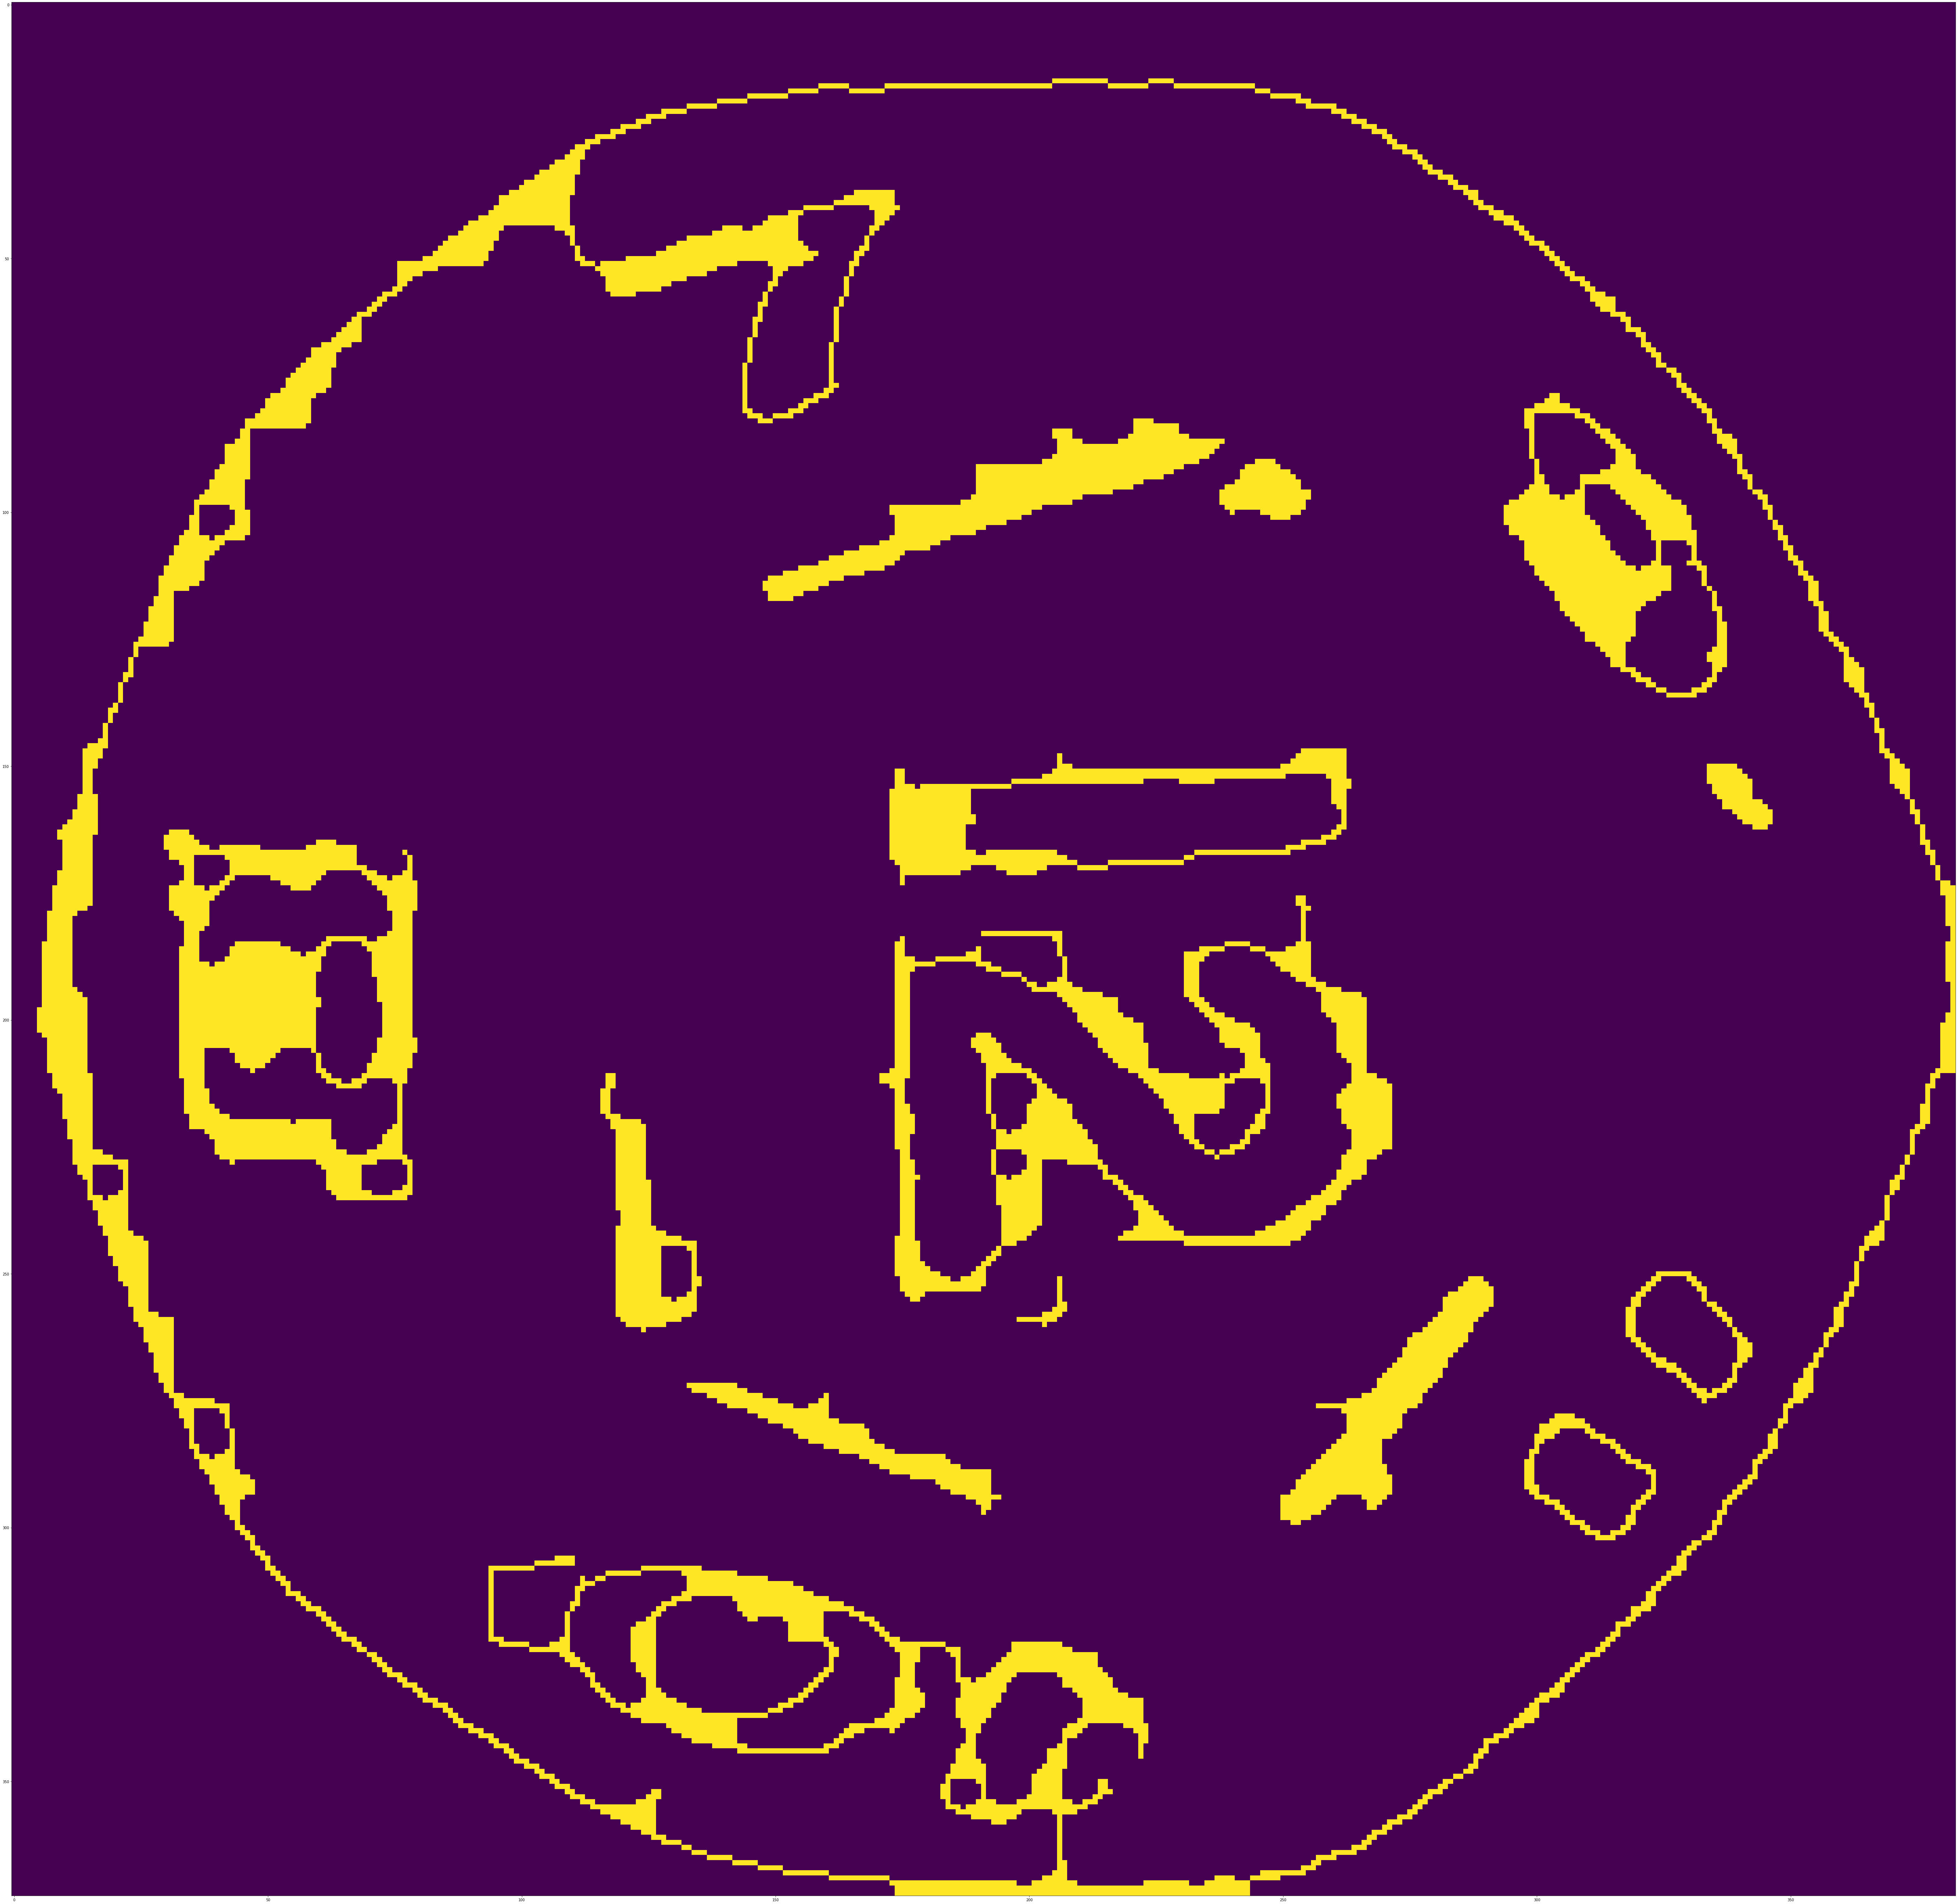

In [199]:
#MAGIC - how do we know what size the tiding up stuff should be?
def circle(diamter):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(diamter,diamter))
#making this genralised is really hard
circleSize = 6

diceMask = cv2.dilate(cannyed,circle(circleSize))
diceMask = cv2.erode(diceMask,circle(circleSize))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

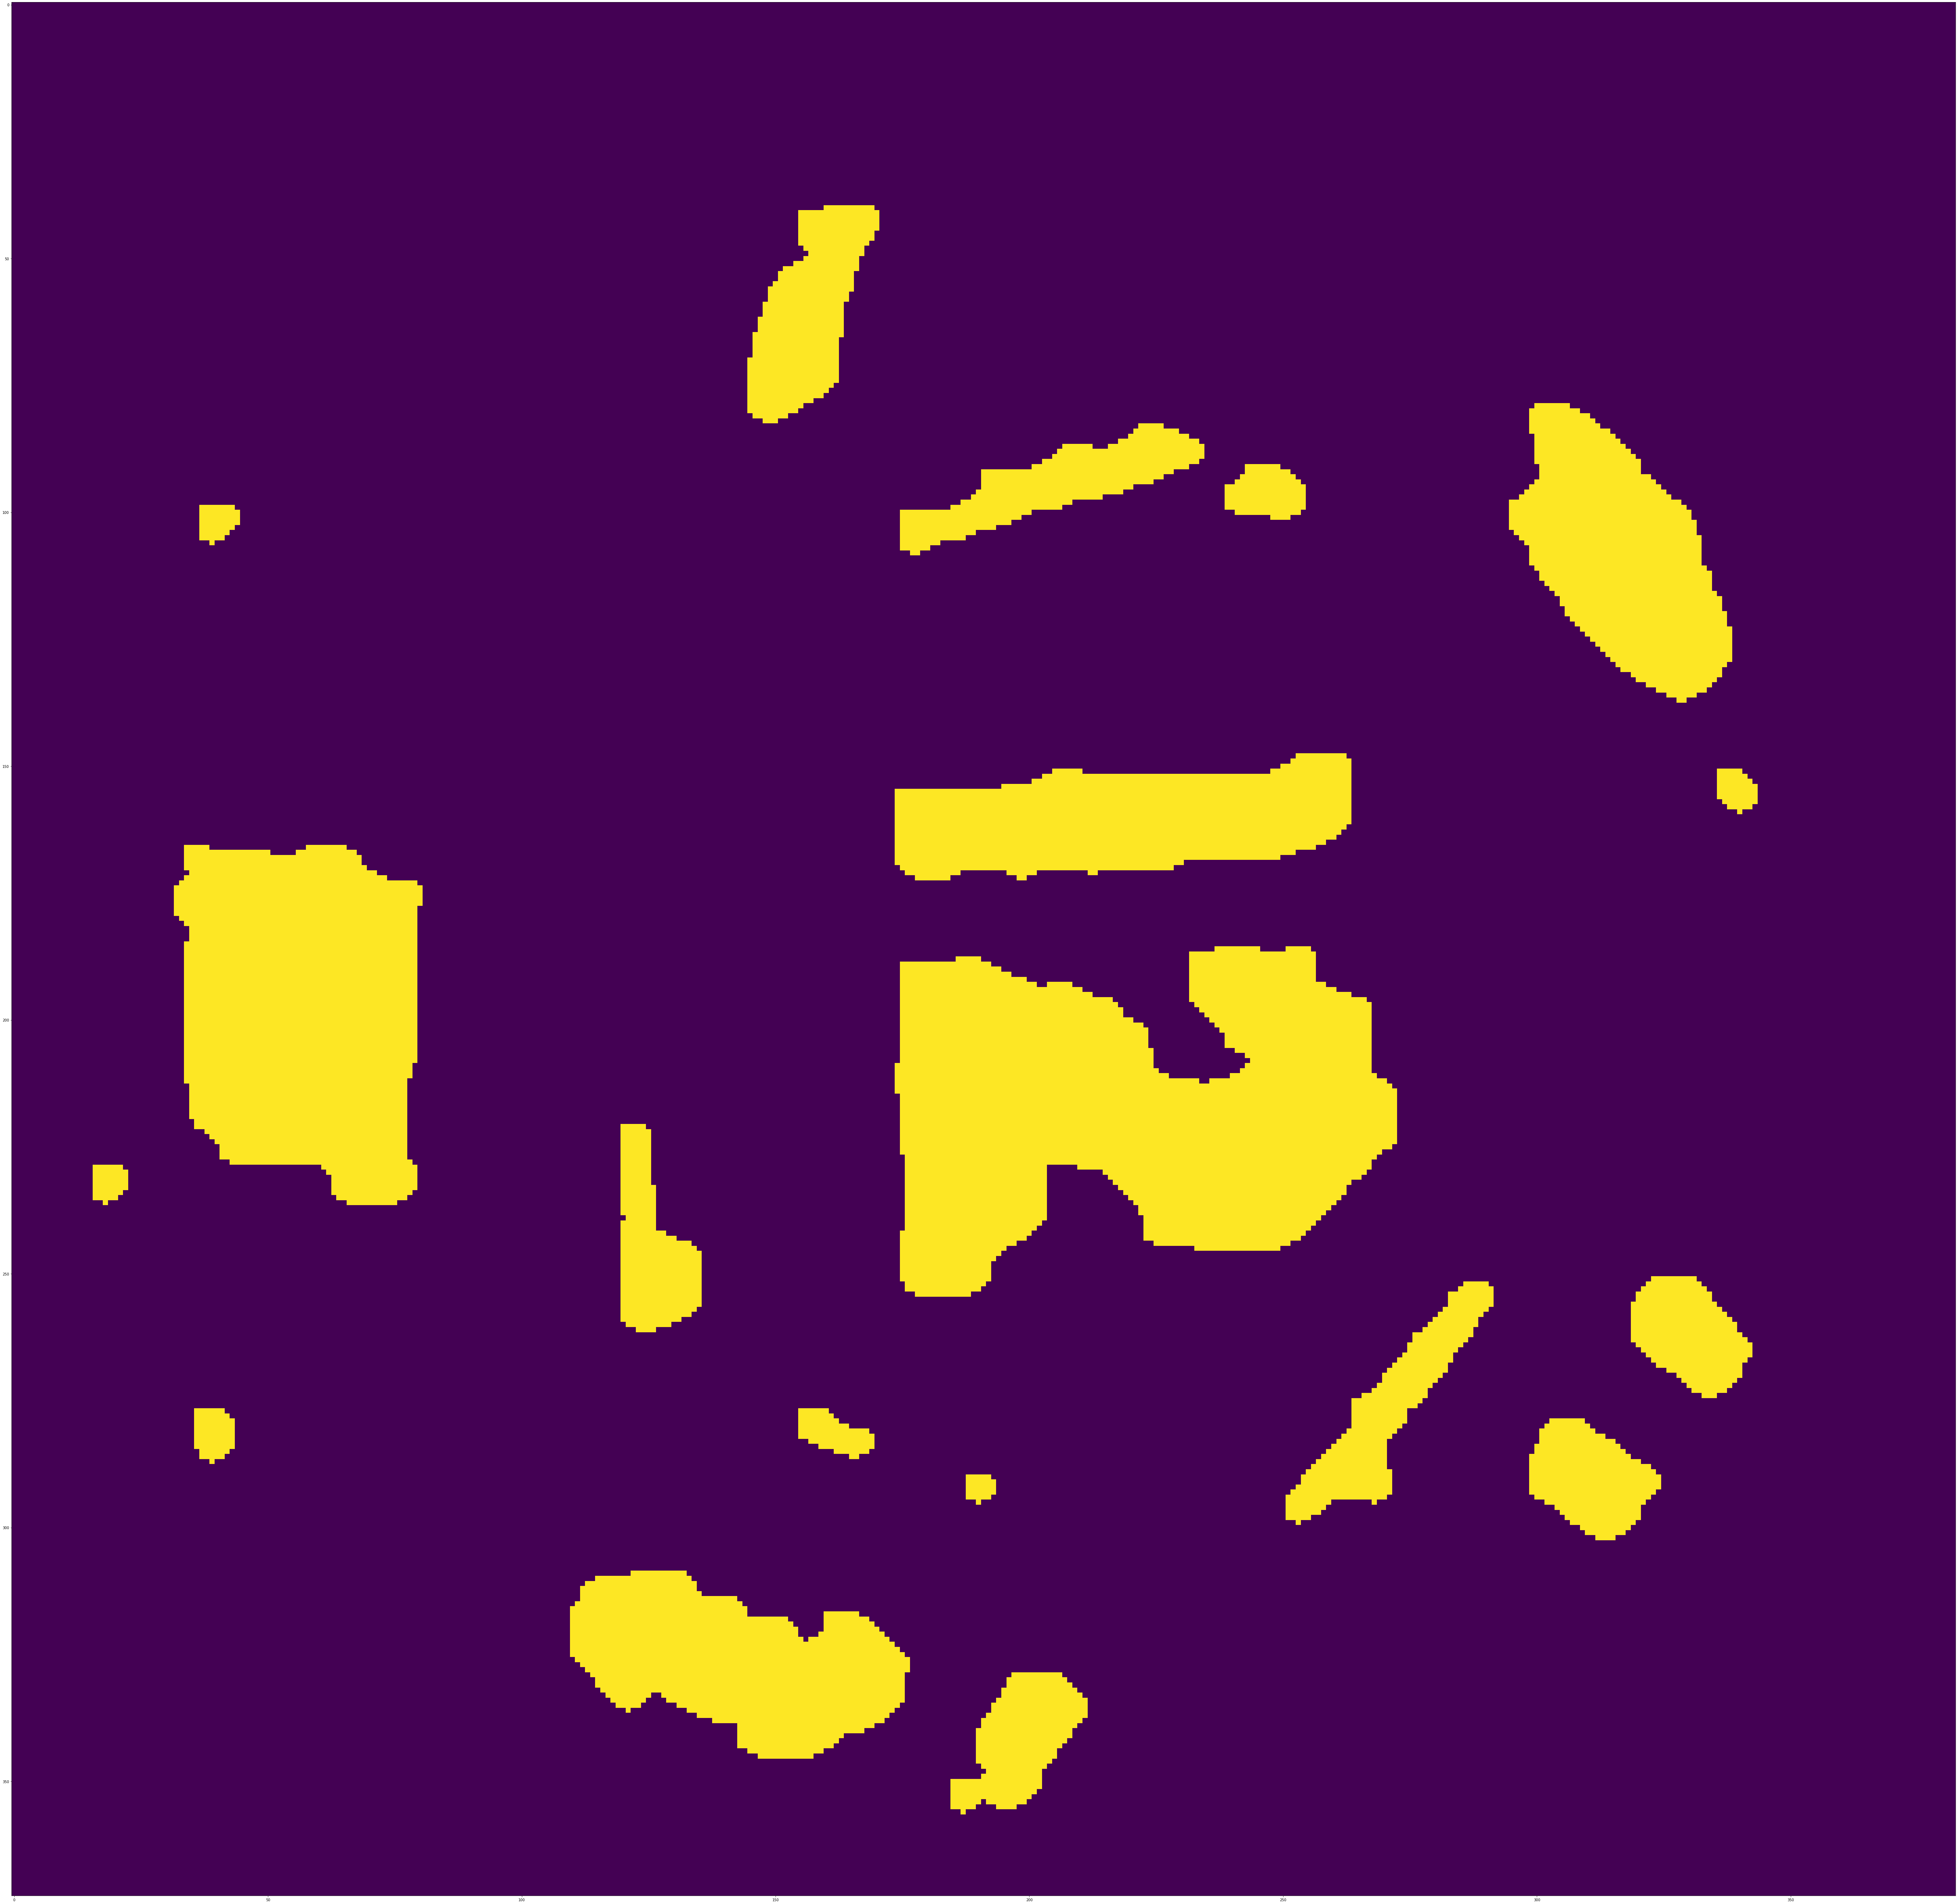

In [200]:
#if debug == 1:
#    plt.figure(figsize=(100,100))
#    plt.imshow(diceMask)
contours, hierarchy = cv2.findContours(diceMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#if debug == 1:
    #print(contours)
    #print(hierarchy)
h, w = diceMask.shape
sizeOfImage = h*w
contoursWithoutDice = []
for contour in contours:
    #print(cv2.boundingRect(contour))
    #print("cv2.boundingRect(contour)[2]:",cv2.boundingRect(contour)[2],"cv2.boundingRect(contour)[3]",cv2.boundingRect(contour)[3],"*:",cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3],"sizeOfImage/2:",sizeOfImage*0.9)
    
    if (cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3] < sizeOfImage*0.5):
        contoursWithoutDice.append(contour)
        #print("added")
    #else:
    #    print("not added")
diceMask = np.zeros(shape=diceMask.shape, dtype=np.uint8)
cv2.fillPoly(diceMask,pts=contoursWithoutDice,color=(255))
#diceMask = cv2.erode(diceMask,circle(circleSize))
#diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(diceMask,contoursWithoutDice,-1,255,thickness=cv2.FILLED)

circleSize = 6

diceMask = cv2.erode(diceMask,circle(circleSize))
diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)    

https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

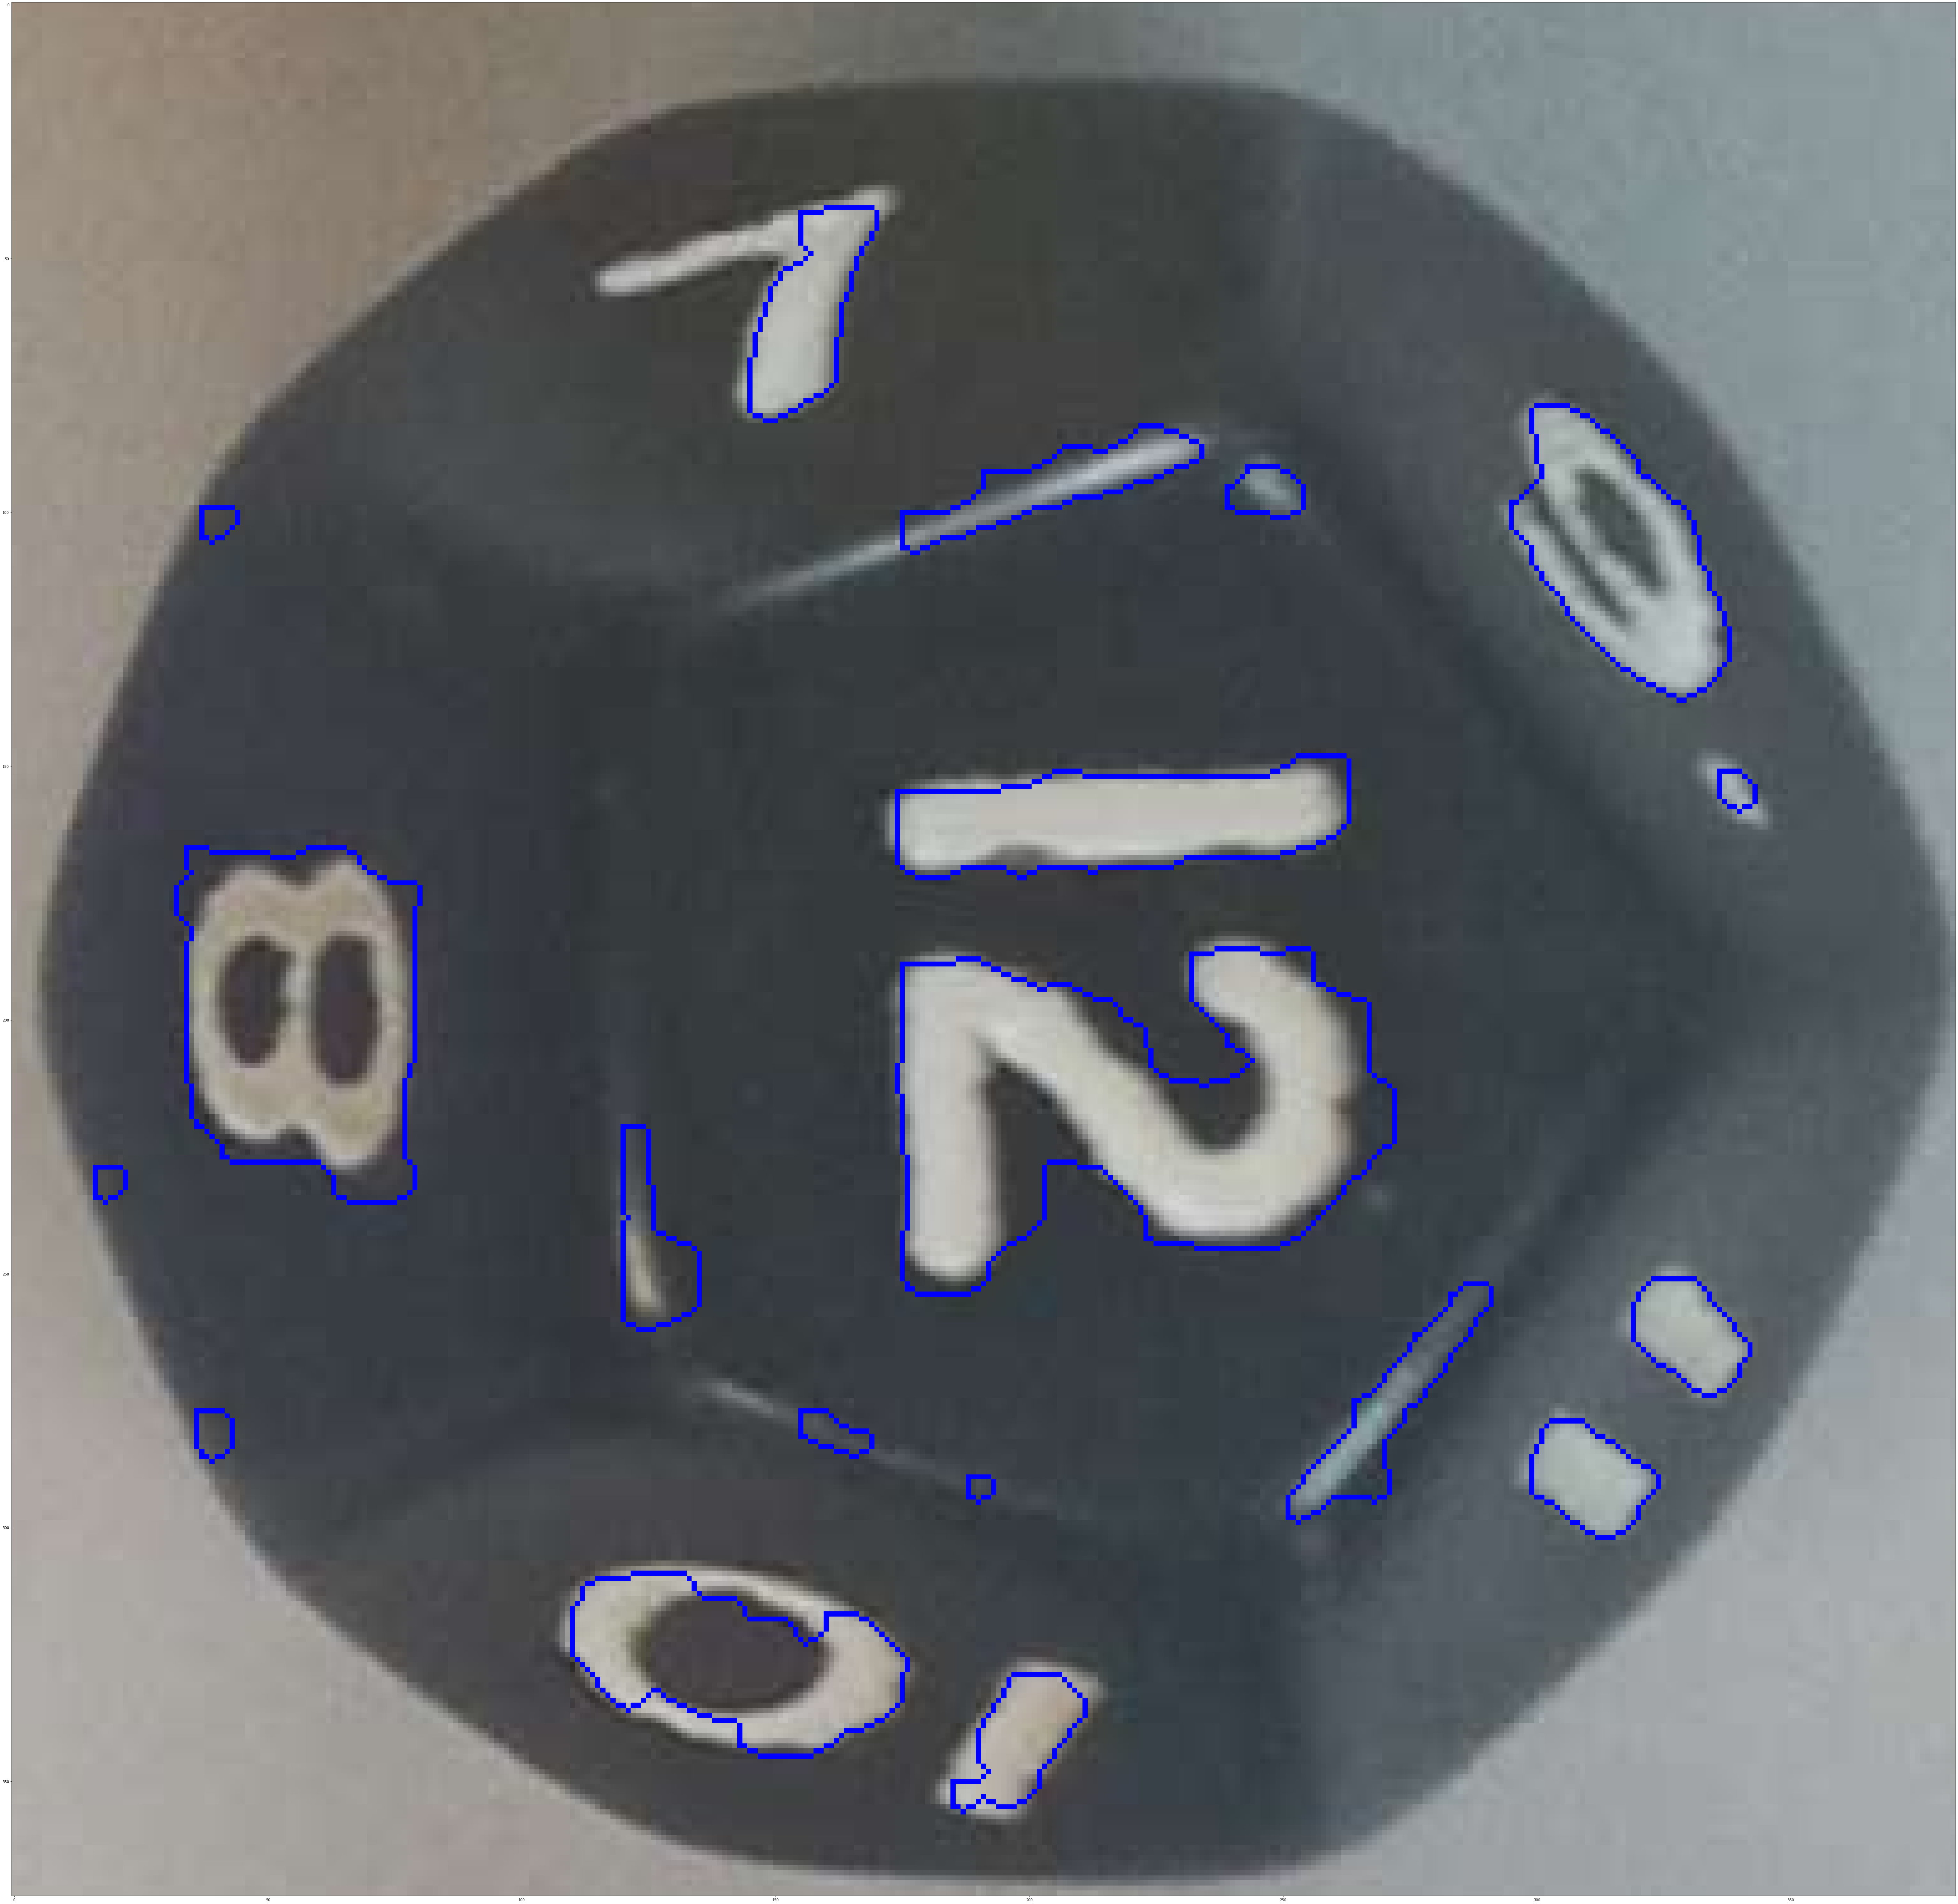

In [201]:
if debug == 1:
    dieRawTemp = copy.deepcopy(dieRaw)
    cv2.drawContours(dieRawTemp,contoursWithoutDice,-1,(0,0,255),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [202]:
h, w = diceMask.shape
midY, midX = h/2, w/2
closestContur = 0
distance = h+w #always way bigger than anyother possible distance
for contur in contoursWithoutDice:
    for cords in contur:
        print("cords:")
        print(cords)
        x,y = cords[0]
        if distBettweenPoints(x,y,midX,midY) < distance:
            closestContur = contur
            distance = distBettweenPoints(x,y,midX,midY)
            if debug == 1:
                print("distance is now:")
                print(distance)

cords:
[[197 329]]
distance is now:
142.60610085126092
cords:
[[196 330]]
cords:
[[196 331]]
cords:
[[195 332]]
cords:
[[195 333]]
cords:
[[193 335]]
cords:
[[193 336]]
cords:
[[191 338]]
cords:
[[191 339]]
cords:
[[190 340]]
cords:
[[190 346]]
cords:
[[192 348]]
cords:
[[190 350]]
cords:
[[185 350]]
cords:
[[185 355]]
cords:
[[186 355]]
cords:
[[187 356]]
cords:
[[188 355]]
cords:
[[189 355]]
cords:
[[191 353]]
cords:
[[192 354]]
cords:
[[193 354]]
cords:
[[194 355]]
cords:
[[197 355]]
cords:
[[198 354]]
cords:
[[199 354]]
cords:
[[202 351]]
cords:
[[202 348]]
cords:
[[205 345]]
cords:
[[205 344]]
cords:
[[208 341]]
cords:
[[208 340]]
cords:
[[211 337]]
cords:
[[211 334]]
cords:
[[206 329]]
cords:
[[122 309]]
distance is now:
140.84211018015884
cords:
[[121 310]]
cords:
[[115 310]]
cords:
[[114 311]]
cords:
[[113 311]]
cords:
[[112 312]]
cords:
[[112 314]]
cords:
[[110 316]]
cords:
[[110 325]]
cords:
[[115 330]]
cords:
[[115 331]]
cords:
[[119 335]]
cords:
[[120 335]]
cords:
[[121 336

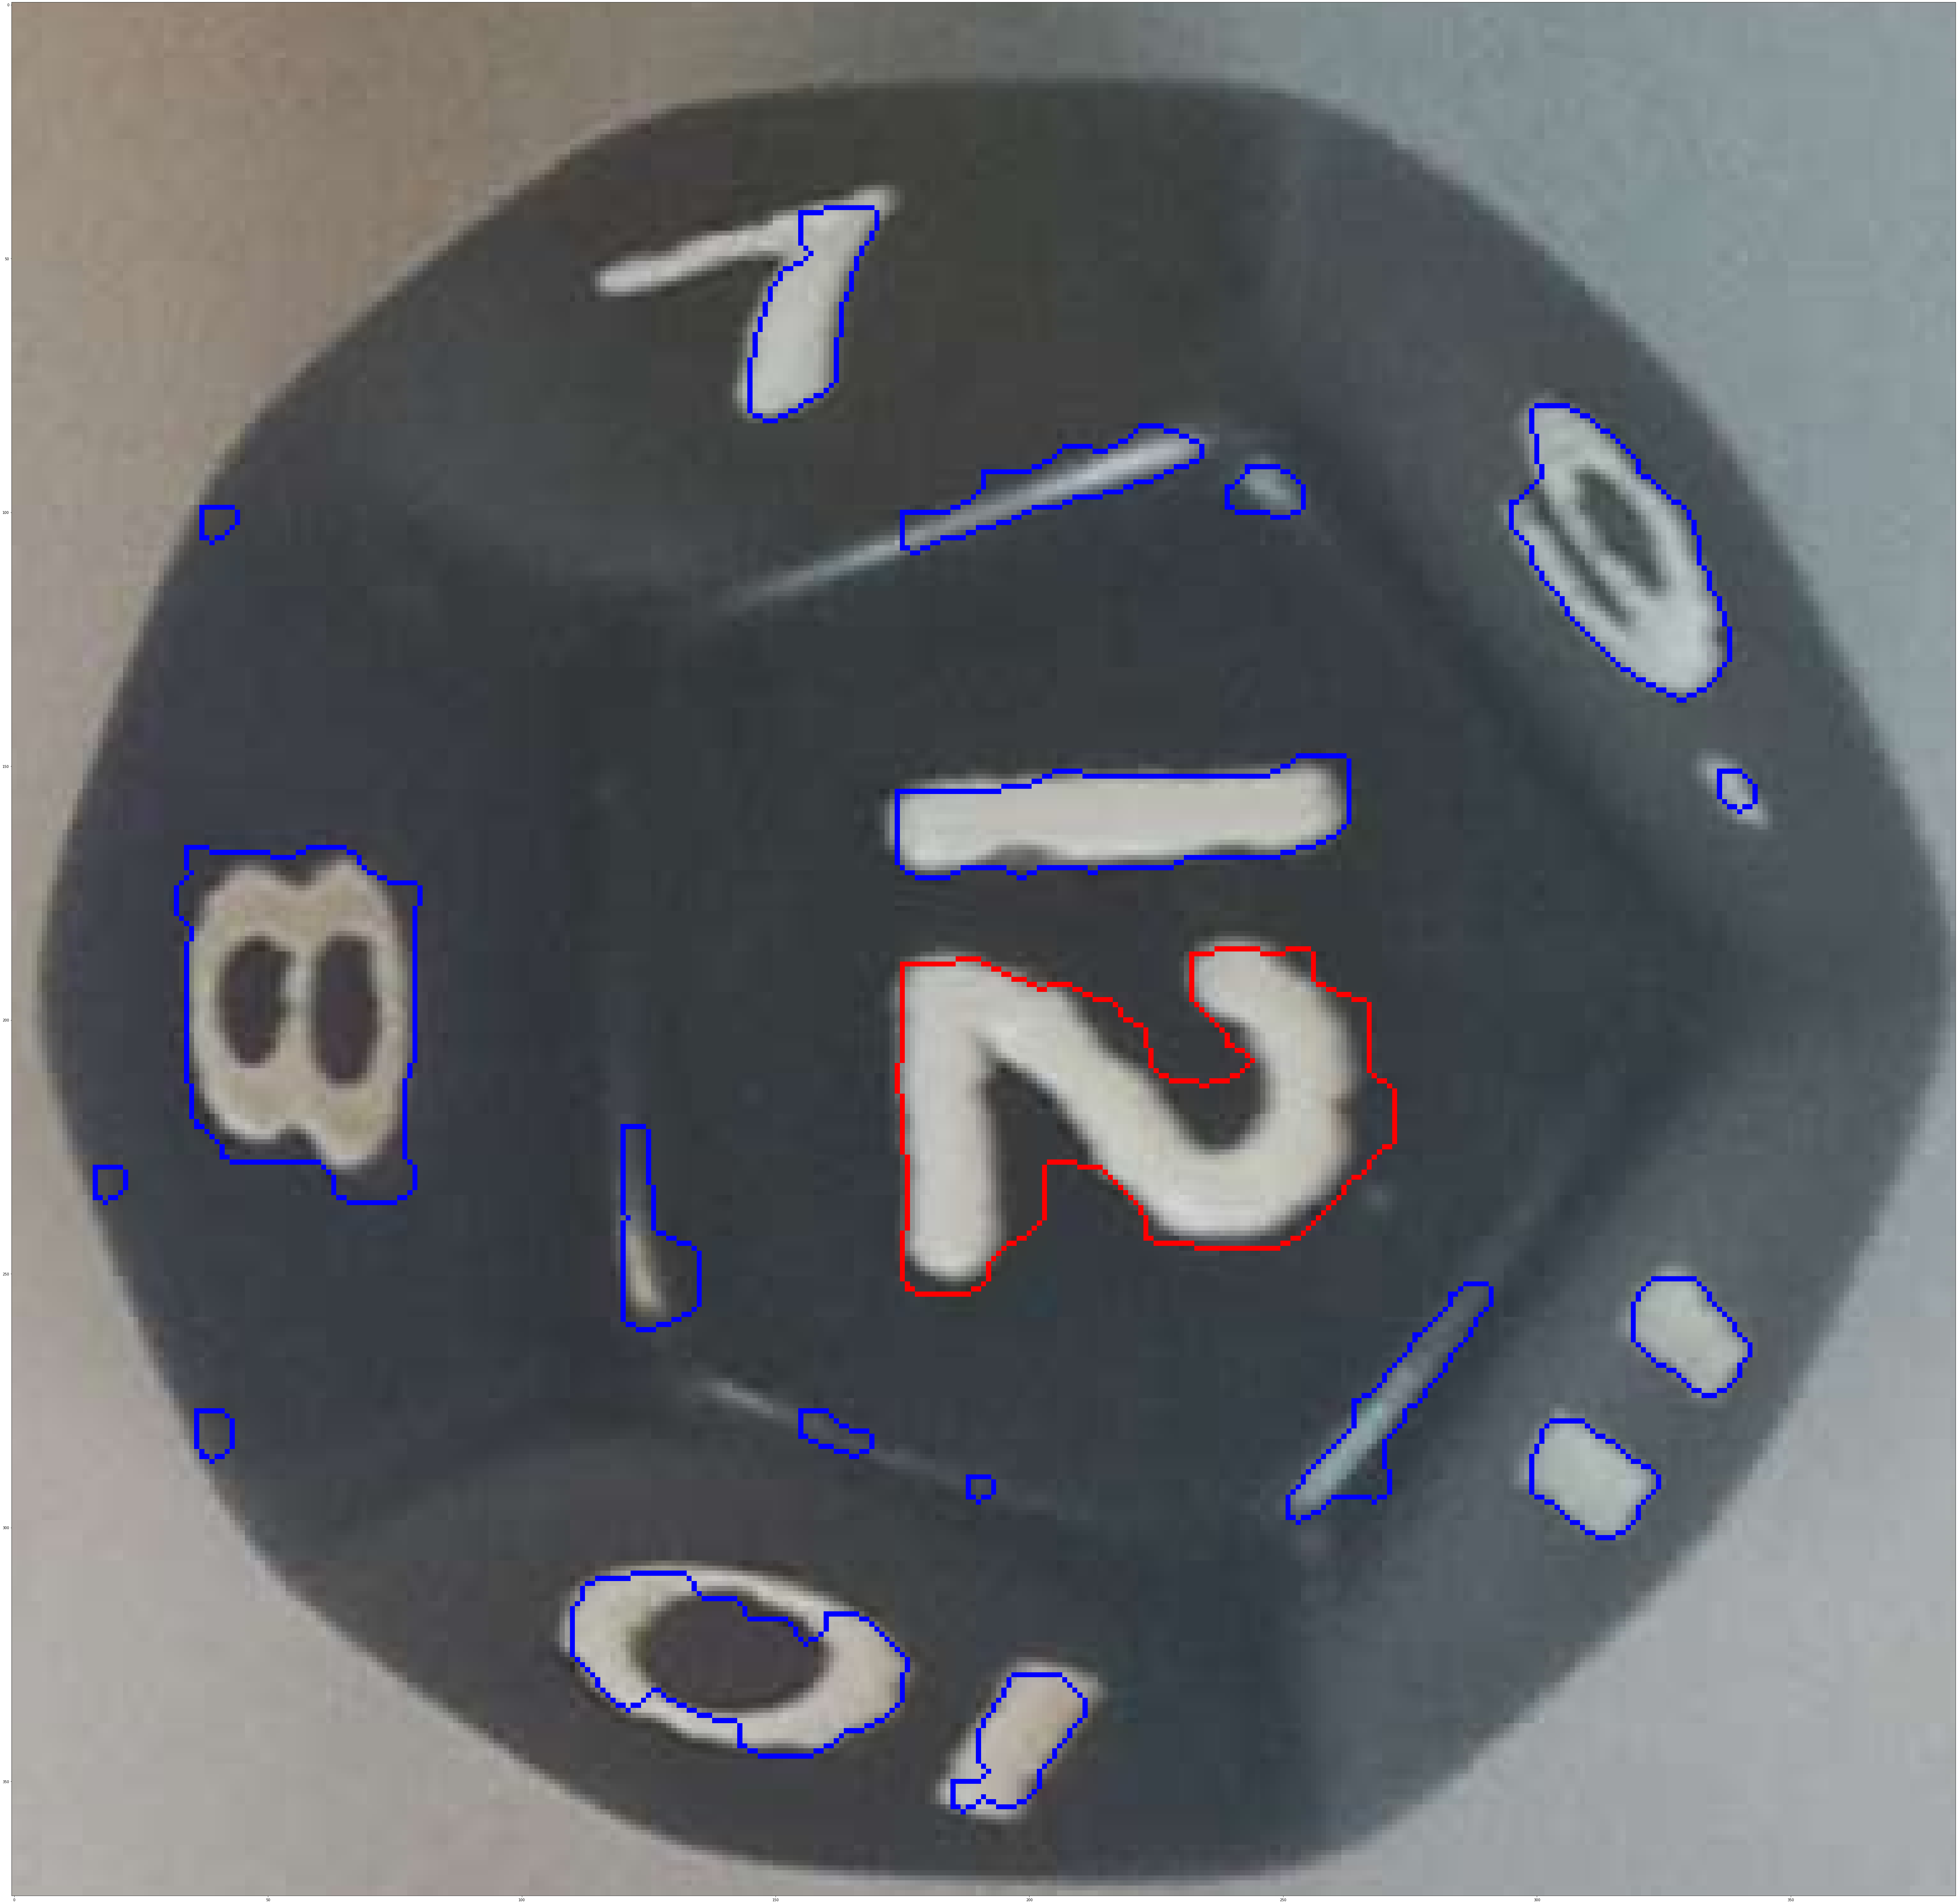

In [203]:
if debug == 1:
    cv2.drawContours(dieRawTemp,[closestContur],-1,(255,0,0),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

whats a moment?

In [204]:
centerMoment = cv2.moments(closestContur)
if debug == 1:
    print(centerMoment)
centerMomentMassCenter = centerMoment['m10'] / (centerMoment['m00'] + 1e-5), centerMoment['m01'] / (centerMoment['m00'] + 1e-5)
if debug == 1:
    print(centerMomentMassCenter)


#sourced from:
# Get the moments
mu = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    mu[i] = cv2.moments(contoursWithoutDice[i])

    # Get the mass centers
mc = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
if debug == 1:
    print(mc)

{'m00': 4436.5, 'm10': 973476.1666666666, 'm01': 965934.3333333333, 'm20': 217191702.0833333, 'm11': 211764277.04166666, 'm02': 211419076.91666666, 'm30': 49236778528.25, 'm21': 47206603486.7, 'm12': 46304758948.5, 'm03': 46516001815.600006, 'mu20': 3587318.6576536894, 'mu11': -185244.4426239729, 'mu02': 1111596.6254211068, 'mu30': 5338427.535240173, 'mu21': -36850.86175429821, 'mu12': -5071914.266239166, 'mu03': 865152.4483032227, 'nu20': 0.1822590006249673, 'nu11': -0.009411616364757786, 'nu02': 0.056476301489159594, 'nu30': 0.004072040954594908, 'nu21': -2.8109067189738756e-05, 'nu12': -0.003868750202936097, 'nu03': 0.0006599202065033336}
(219.42435804630296, 217.72440688743137)
[(198.4599863467697, 341.70003401711506), (142.22367882796044, 326.6408768249296), (190.3665714833809, 292.11652060840635), (310.47346656569056, 290.36957673643917), (161.4496427584372, 281.45186378722184), (39.376061645117666, 281.4871313697211), (270.7636811345042, 276.9944502357356), (329.9556091608421, 2

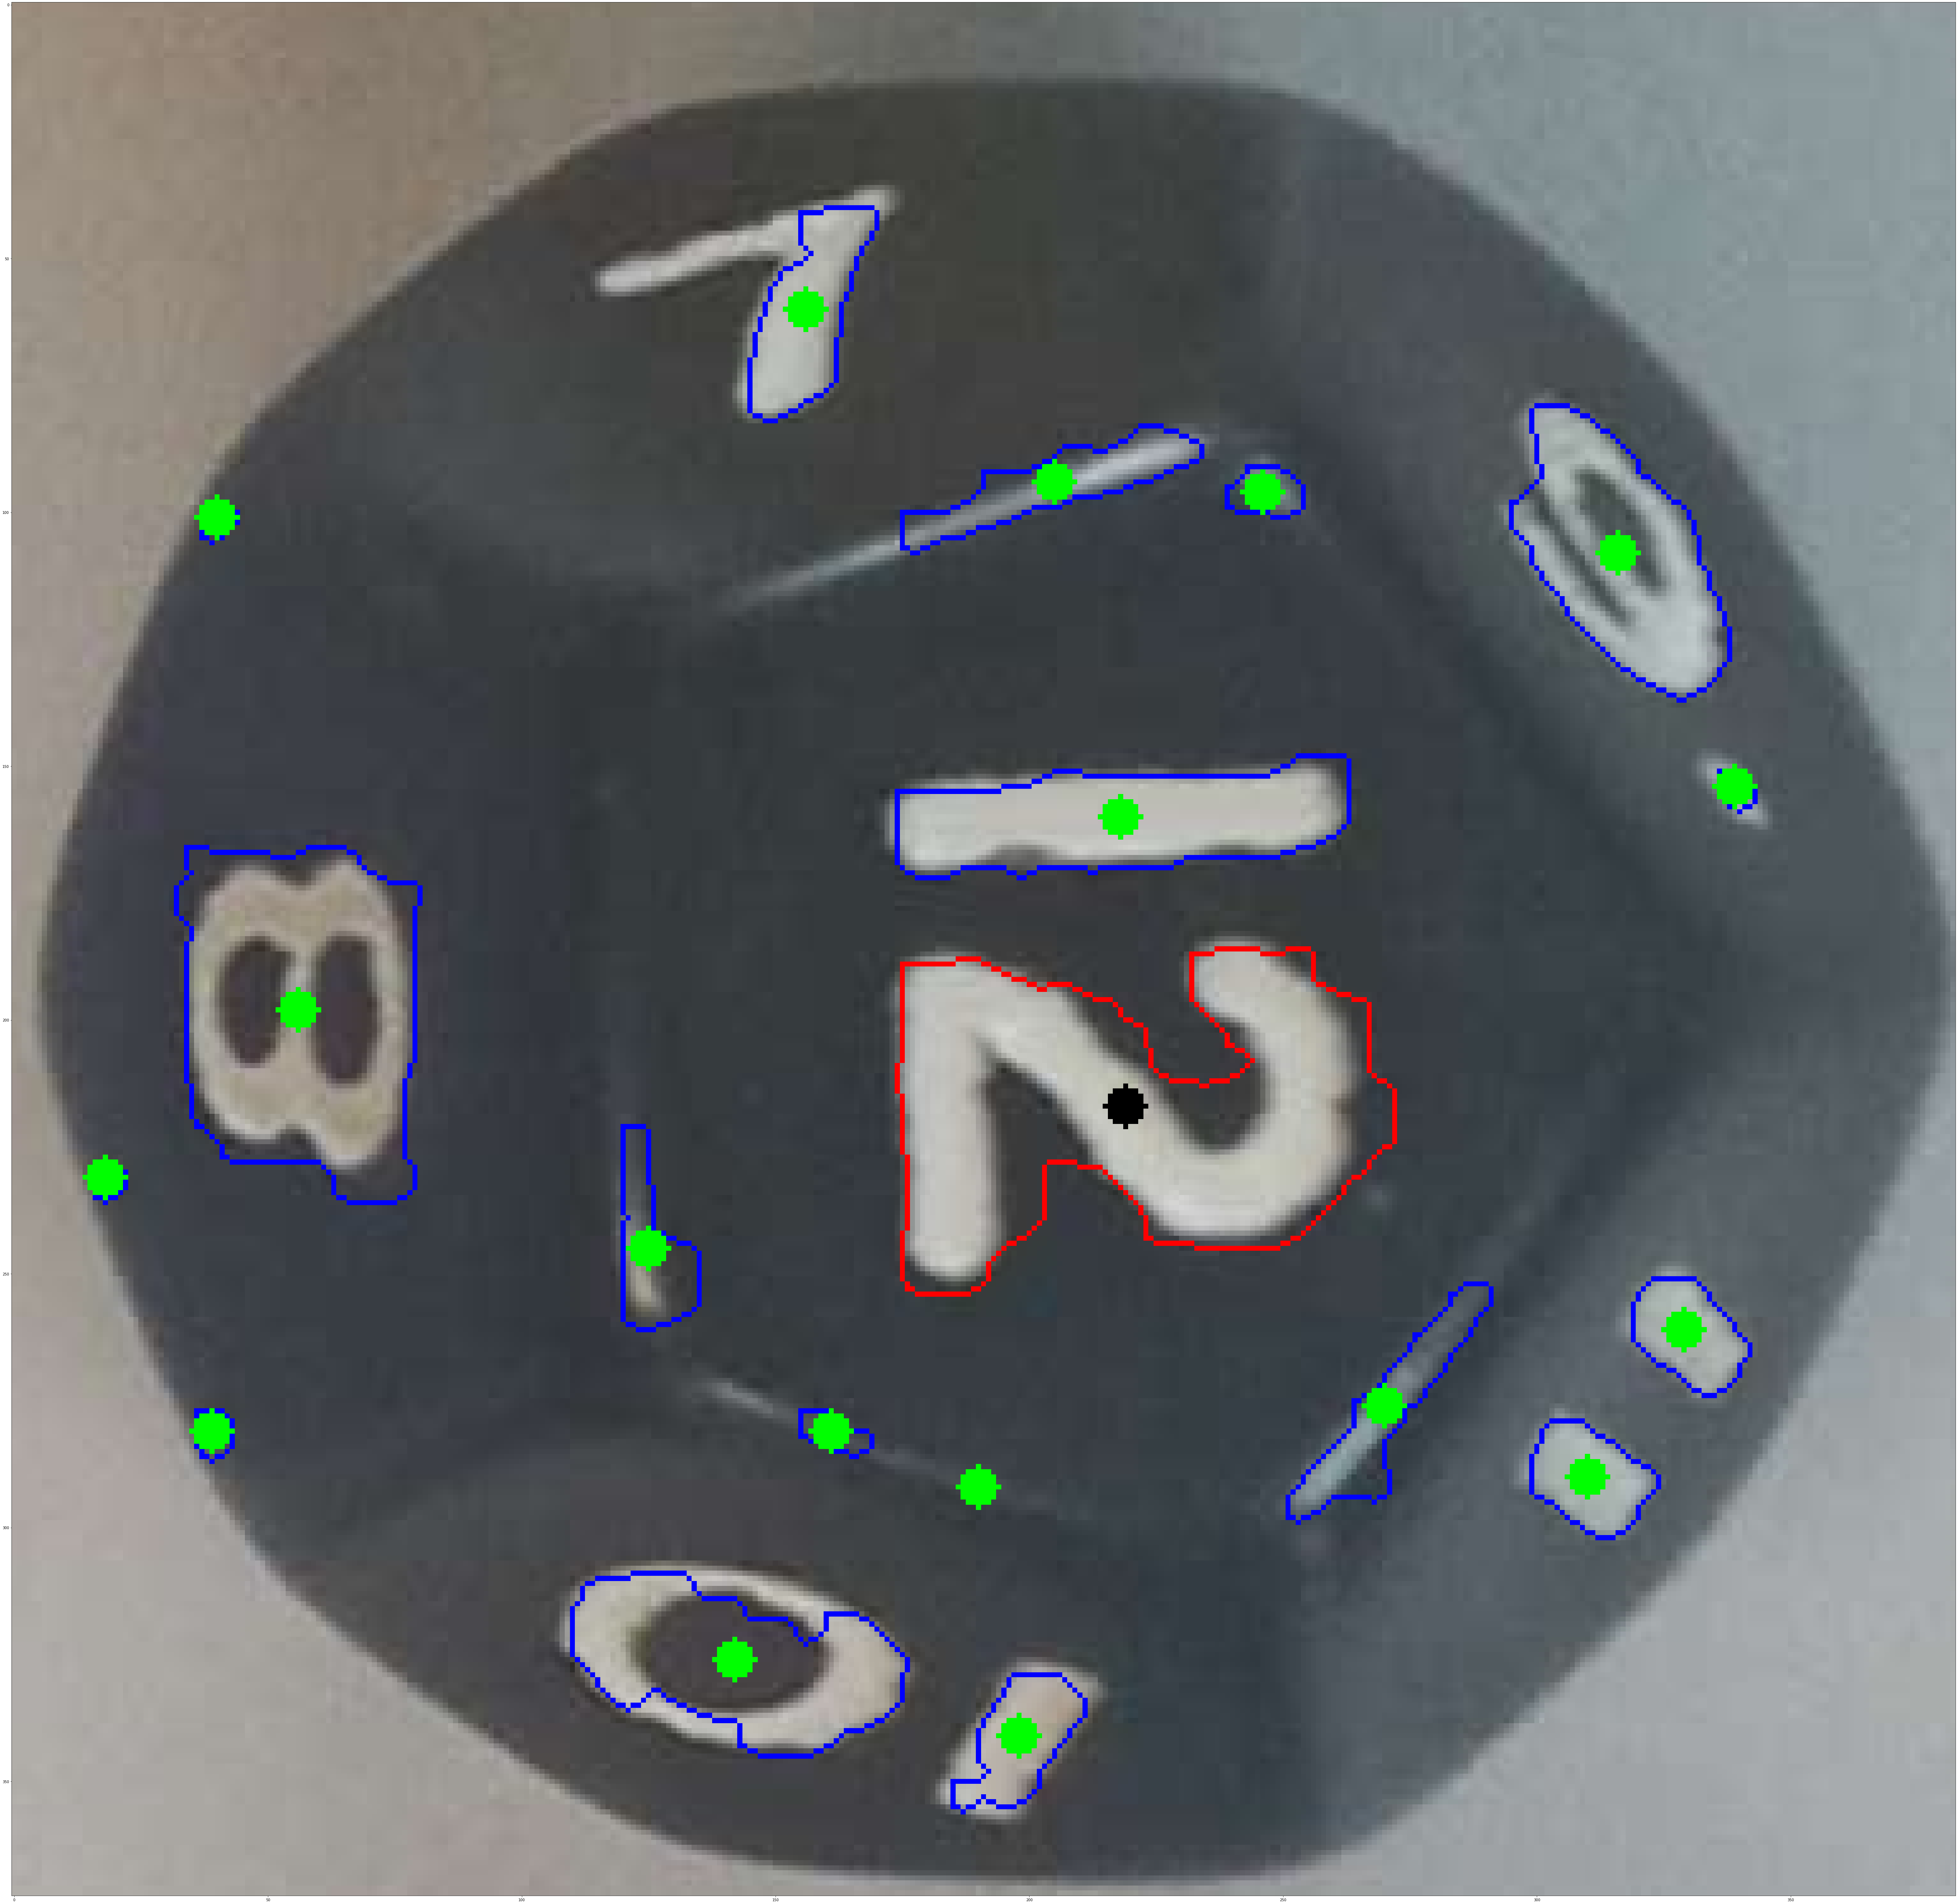

In [205]:
if debug == 1:
    for i in range(len(contoursWithoutDice)):
        cv2.circle(dieRawTemp, (int(mc[i][0]), int(mc[i][1])), 4, (0,255,0), -1)
    cv2.circle(dieRawTemp,(int(centerMomentMassCenter[0]),int(centerMomentMassCenter[1])),4,(0,0,0),-1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

illustrated above is a problem spefilcy the 9 with two dots inside of it
the following code works around this but really this problem should be fixed using hirarcys
https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
\<refactor using this might make faster code

In [206]:
distance = h+w #always way bigger than anyother possible distance

xCord1 = centerMomentMassCenter[0]
yCord1 = centerMomentMassCenter[1]
secondClosestCord = ()
secondClosestCordIndex = 0
i = 0
for cords in mc:
    xCord2 = cords[0]
    yCord2 = cords[1]
    if distBettweenPoints(xCord1,yCord1,xCord2,yCord2) < distance and cords != centerMomentMassCenter and cv2.pointPolygonTest(contour=closestContur,pt=cords,measureDist=False)==-1:
        secondClosestCord = cords
        secondClosestCordIndex = i
        distance = distBettweenPoints(xCord1,yCord1,xCord2,yCord2)
    i += 1
    
print(secondClosestCord)
print(secondClosestCordIndex)
print(distance)

(218.48825209338483, 160.67065496007987)
13
57.06143096122681


time to use this https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

vx1: [0.96568877] vy1: [-0.2597021] x: [218.5625] y: [218.9375]
vx2: [0.9934957] vy2: [-0.11386959] x: [224.28572] y: [161.71428]


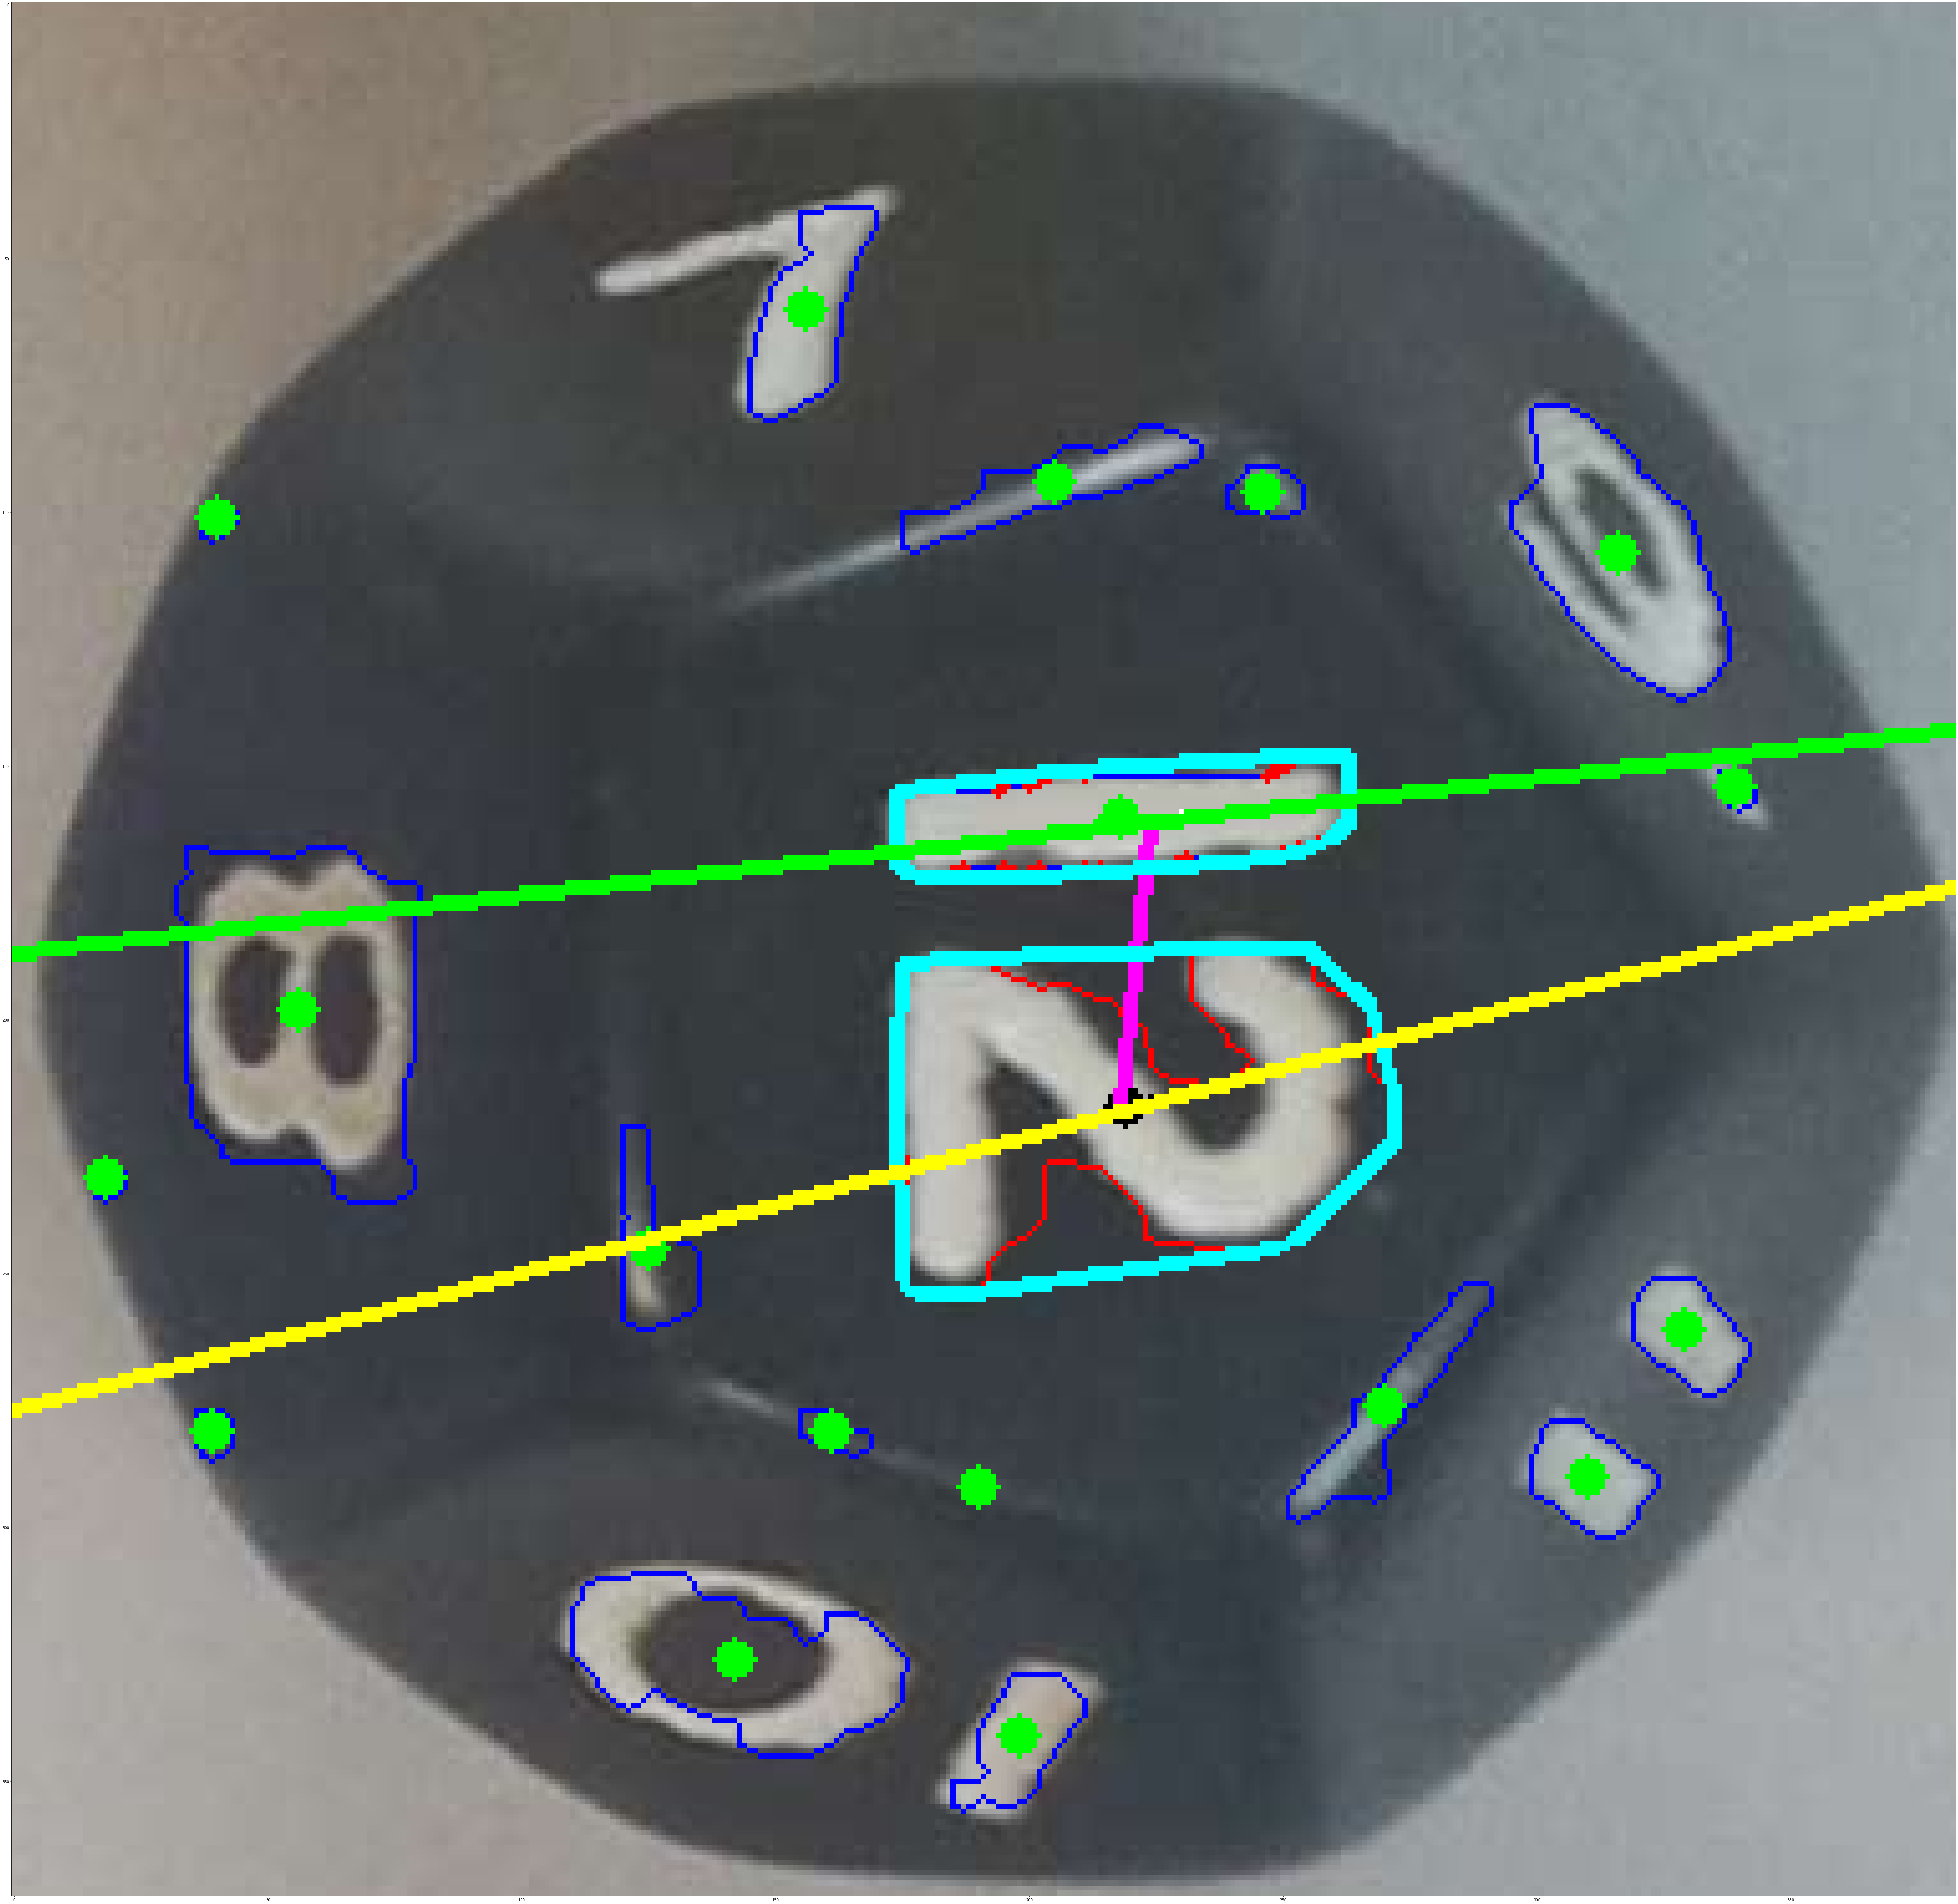

In [217]:
hullOfClosestCenter = cv2.convexHull(closestContur)
hullOfSecondClosest = cv2.convexHull(contoursWithoutDice[secondClosestCordIndex])

if debug == 1:
    cv2.drawContours(dieRawTemp,contoursWithoutDice[secondClosestCordIndex],-1,(255,0,0),2)
    cv2.drawContours(dieRawTemp,[hullOfClosestCenter],-1,(0,255,255),2)
    cv2.drawContours(dieRawTemp,[hullOfSecondClosest],-1,(0,255,255),2)

rows,cols = dieRawTemp.shape[:2]
        
[vx1,vy1,x1,y1] = cv2.fitLine(hullOfClosestCenter, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x1*vy1/vx1) + y1)
    righty = int(((cols-x1)*vy1/vx1)+y1)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(255,255,0),2)
    print("vx1:",vx1,"vy1:",vy1,"x:",x1,"y:",y1)
        
[vx2,vy2,x2,y2] = cv2.fitLine(hullOfSecondClosest, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x2*vy2/vx2) + y2)
    righty = int(((cols-x2)*vy2/vx2)+y2)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(0,255,0),2)
    print("vx2:",vx2,"vy2:",vy2,"x:",x2,"y:",y2)
    
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

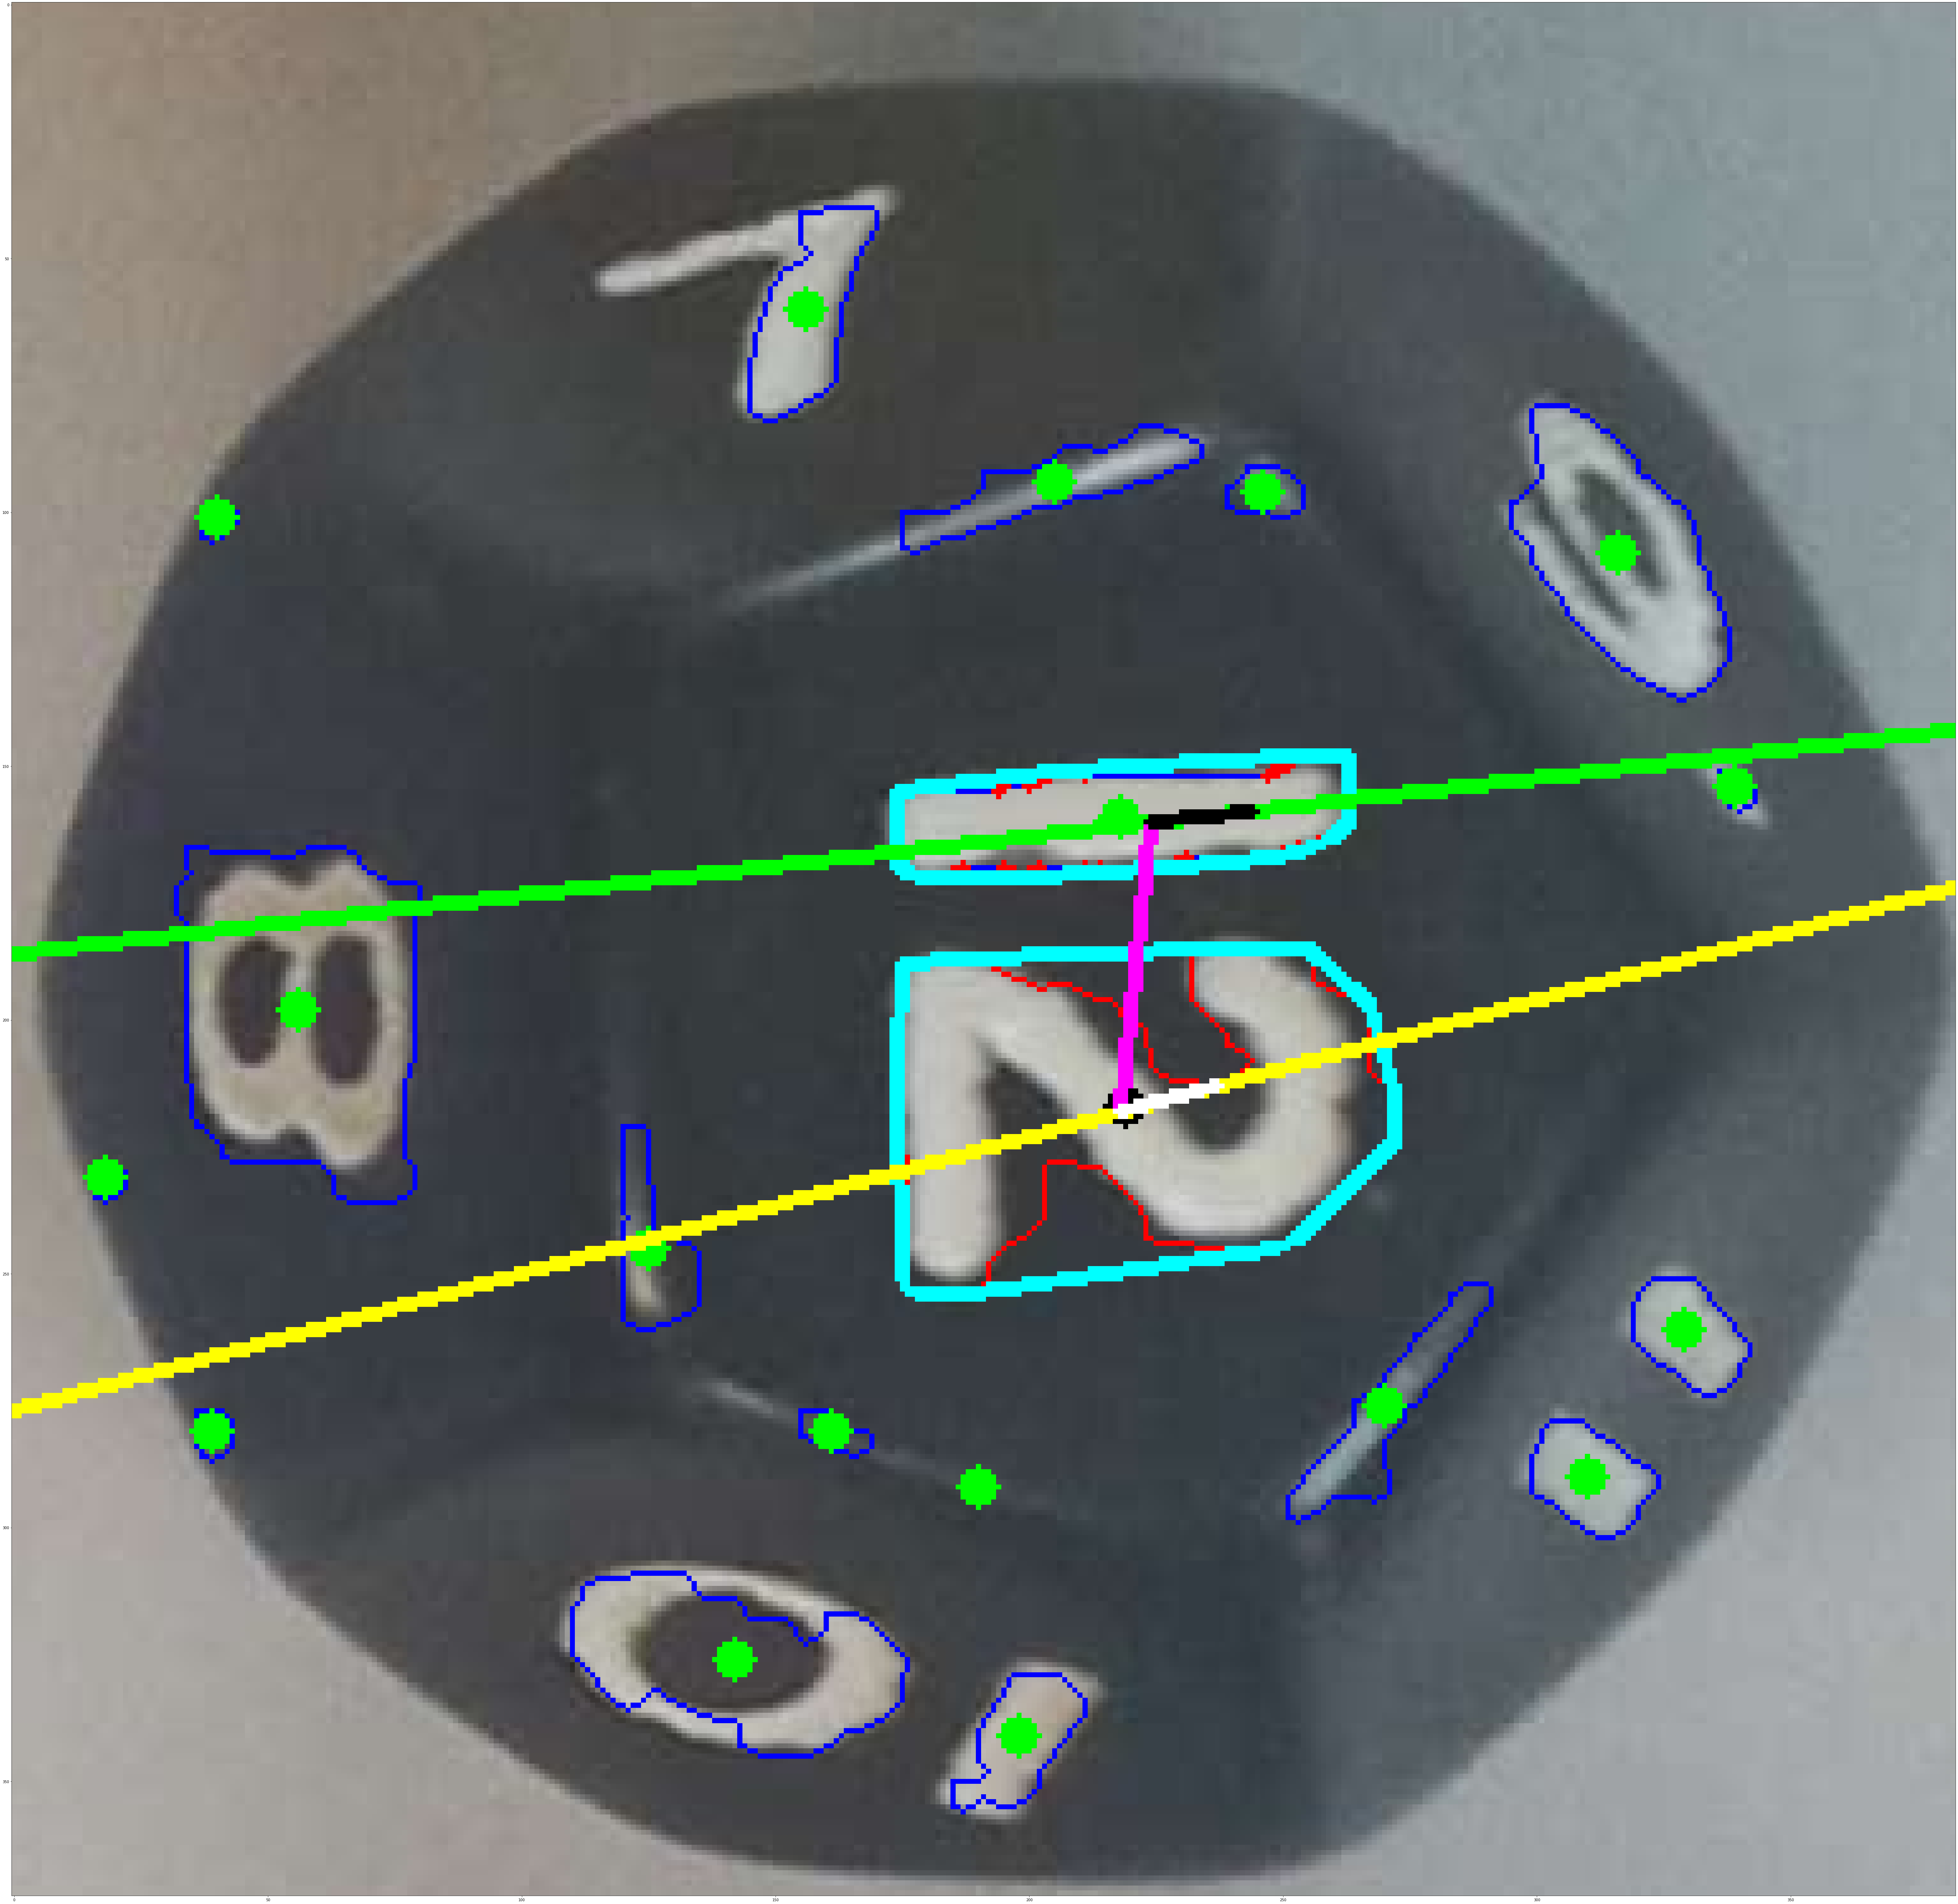

In [218]:
if debug == 1:
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x1),int(y1)),(255,0,255),2)
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x2+vx2*20),int(y2+vy2*20)),(0,0,0),2)
    cv2.line(dieRawTemp,(int(x1),int(y1)),(int(x1+vx1*20),int(y1+vy1*20)),(255,255,255),2)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [219]:
from math import sqrt
from math import acos

def pythagoras(x,y):
    x2 = x**2
    y2 = y**2
    return sqrt(x2+y2)

def dotProduct(x1,y1,x2,y2):
    return (x1*x2)+(y1*y2)

def angleBettween(vector1x,vector1y,vector2x,vector2y):
    print(vector1x,vector1y,vector2x,vector2y)
    
    vec1Len = pythagoras(vector1x,vector1y)
    vec2Len = pythagoras(vector2x,vector2y)
    
    dotProd = dotProduct(vector1x,vector1y,vector2x,vector2y)
    print("acos(",dotProd[0],"/",vec1Len,"*",vec2Len,")")
    
    return acos((dotProd[0]/((vec1Len*vec2Len)+1e-5)))

# acos(dot product(U,V)/Mangitued V * Mangintued U)

In [229]:
angle = angleBettween(vx1,vy1,vx2,vy2)
vx3 = x1 - x2
vy3 = y1 - y2
print("vx3",vx3,"vy3",vy3)
shouldBe90 = angleBettween(vx1,vy1,vx3,vy3)
if debug == 1:
    print(angle,shouldBe90*57.29578)

[0.96568877] [-0.2597021] [0.9934957] [-0.11386959]
acos( 0.9889798 / 0.9999999701976772 * 1.0 )
vx3 [-5.723221] vy3 [57.22322]
[0.96568877] [-0.2597021] [-5.723221] [57.22322]
acos( -20.38784 / 0.9999999701976772 * 57.50871622116294 )
0.14866324778323223 110.76386735883015


In [221]:
import math
math.pi
-0.104833126/(52.95769611798648)

-0.001979563570258764

In [222]:
1e-5 == 0.00001

True

In [223]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    
#from: https://stackoverflow.com/a/48553593
def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, theta = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if debug == 1:
        print(center)
        print(size)
    size = (size[0]+14,size[1]+14)
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, src.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

In [224]:
def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    if debug == 1:
        plt.figure(figsize=(100,100))
        plt.subplot(1,2,1),plt.imshow(img_rot)

In [225]:
print(angleToRoateBy*57.29578)


83.4616376261831


[0.96568877] [-0.2597021] 0 -1
acos( 0.2597021 / 0.9999999701976772 * 1.0 )
74.94776851263647


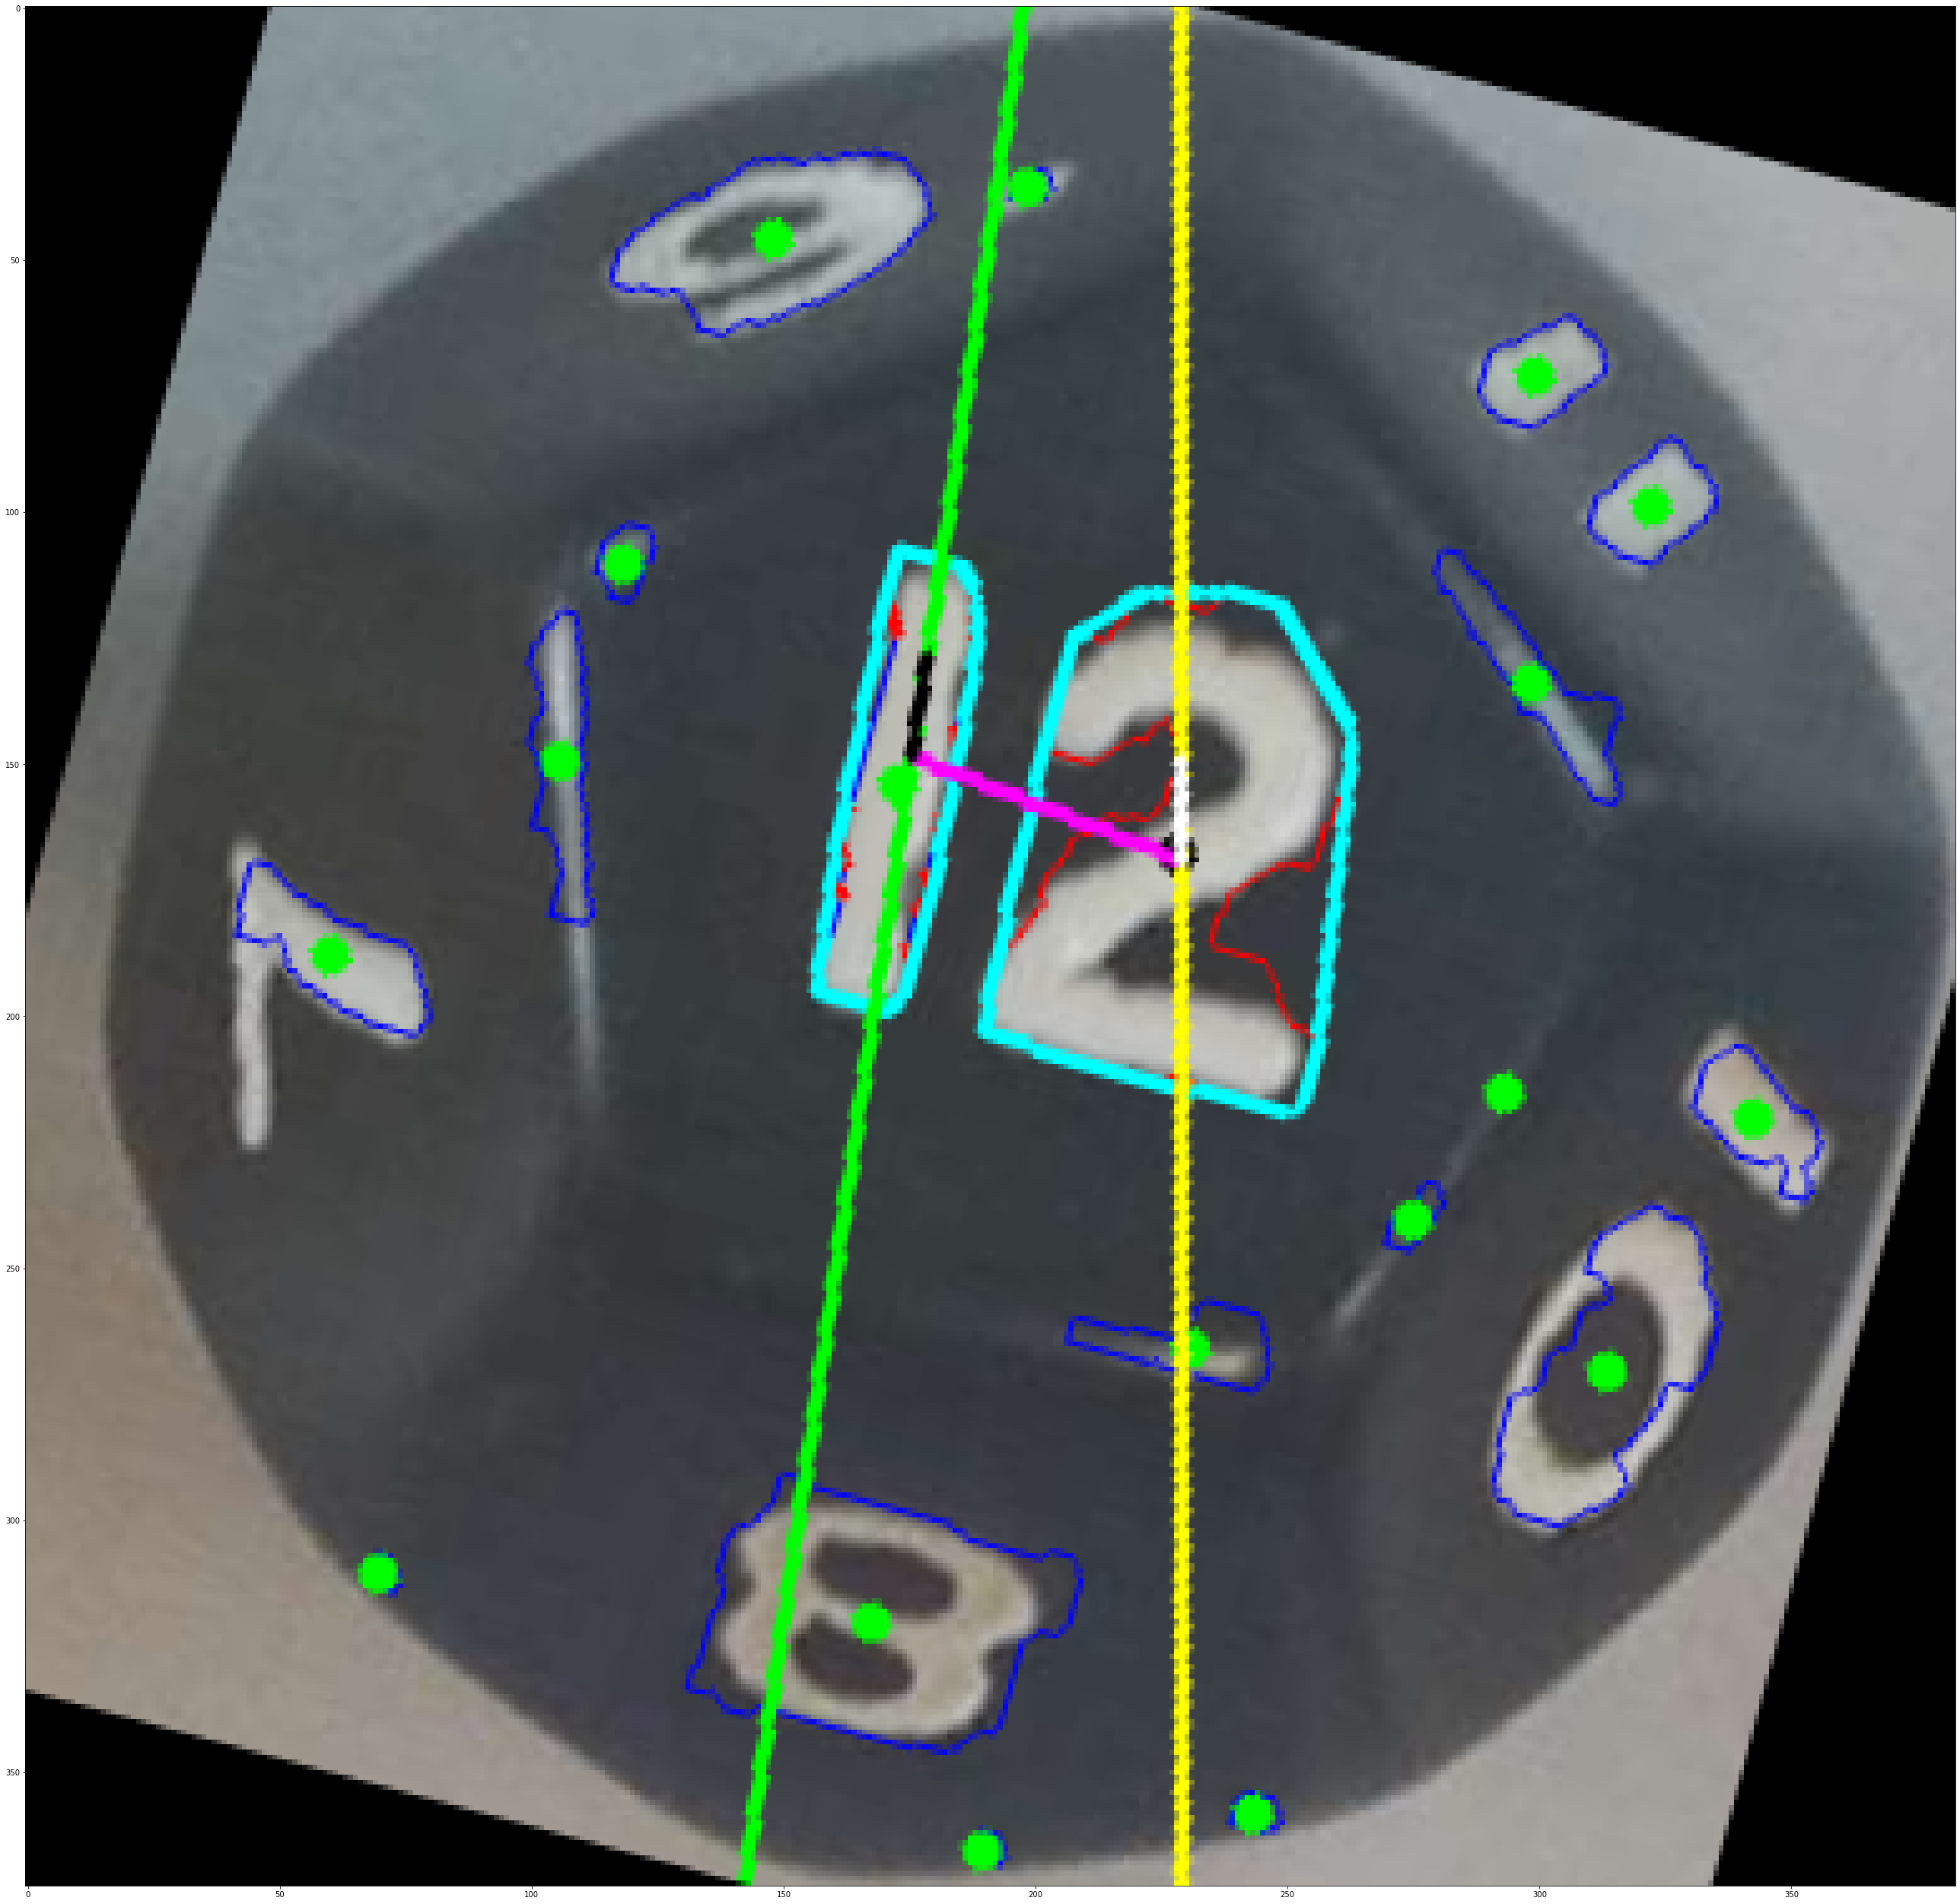

In [226]:
angleToRoateBy = angleBettween(vx1,vy1,0,-1)
angleToRoateBy = angleToRoateBy%math.pi
print(angleToRoateBy*57.29578)
imgRotate(dieRawTemp,(angleToRoateBy*57.29578))

((222.99365234375, 219.58847045898438), (66.02767944335938, 98.37535858154297), 87.75425720214844)
((218.593505859375, 160.3556365966797), (20.53742027282715, 90.1651382446289), 86.05481719970703)
1.6994400024414062
(222, 219)
(66, 98)
(218, 160)
(20, 90)
(218, 160)
(20, 90)


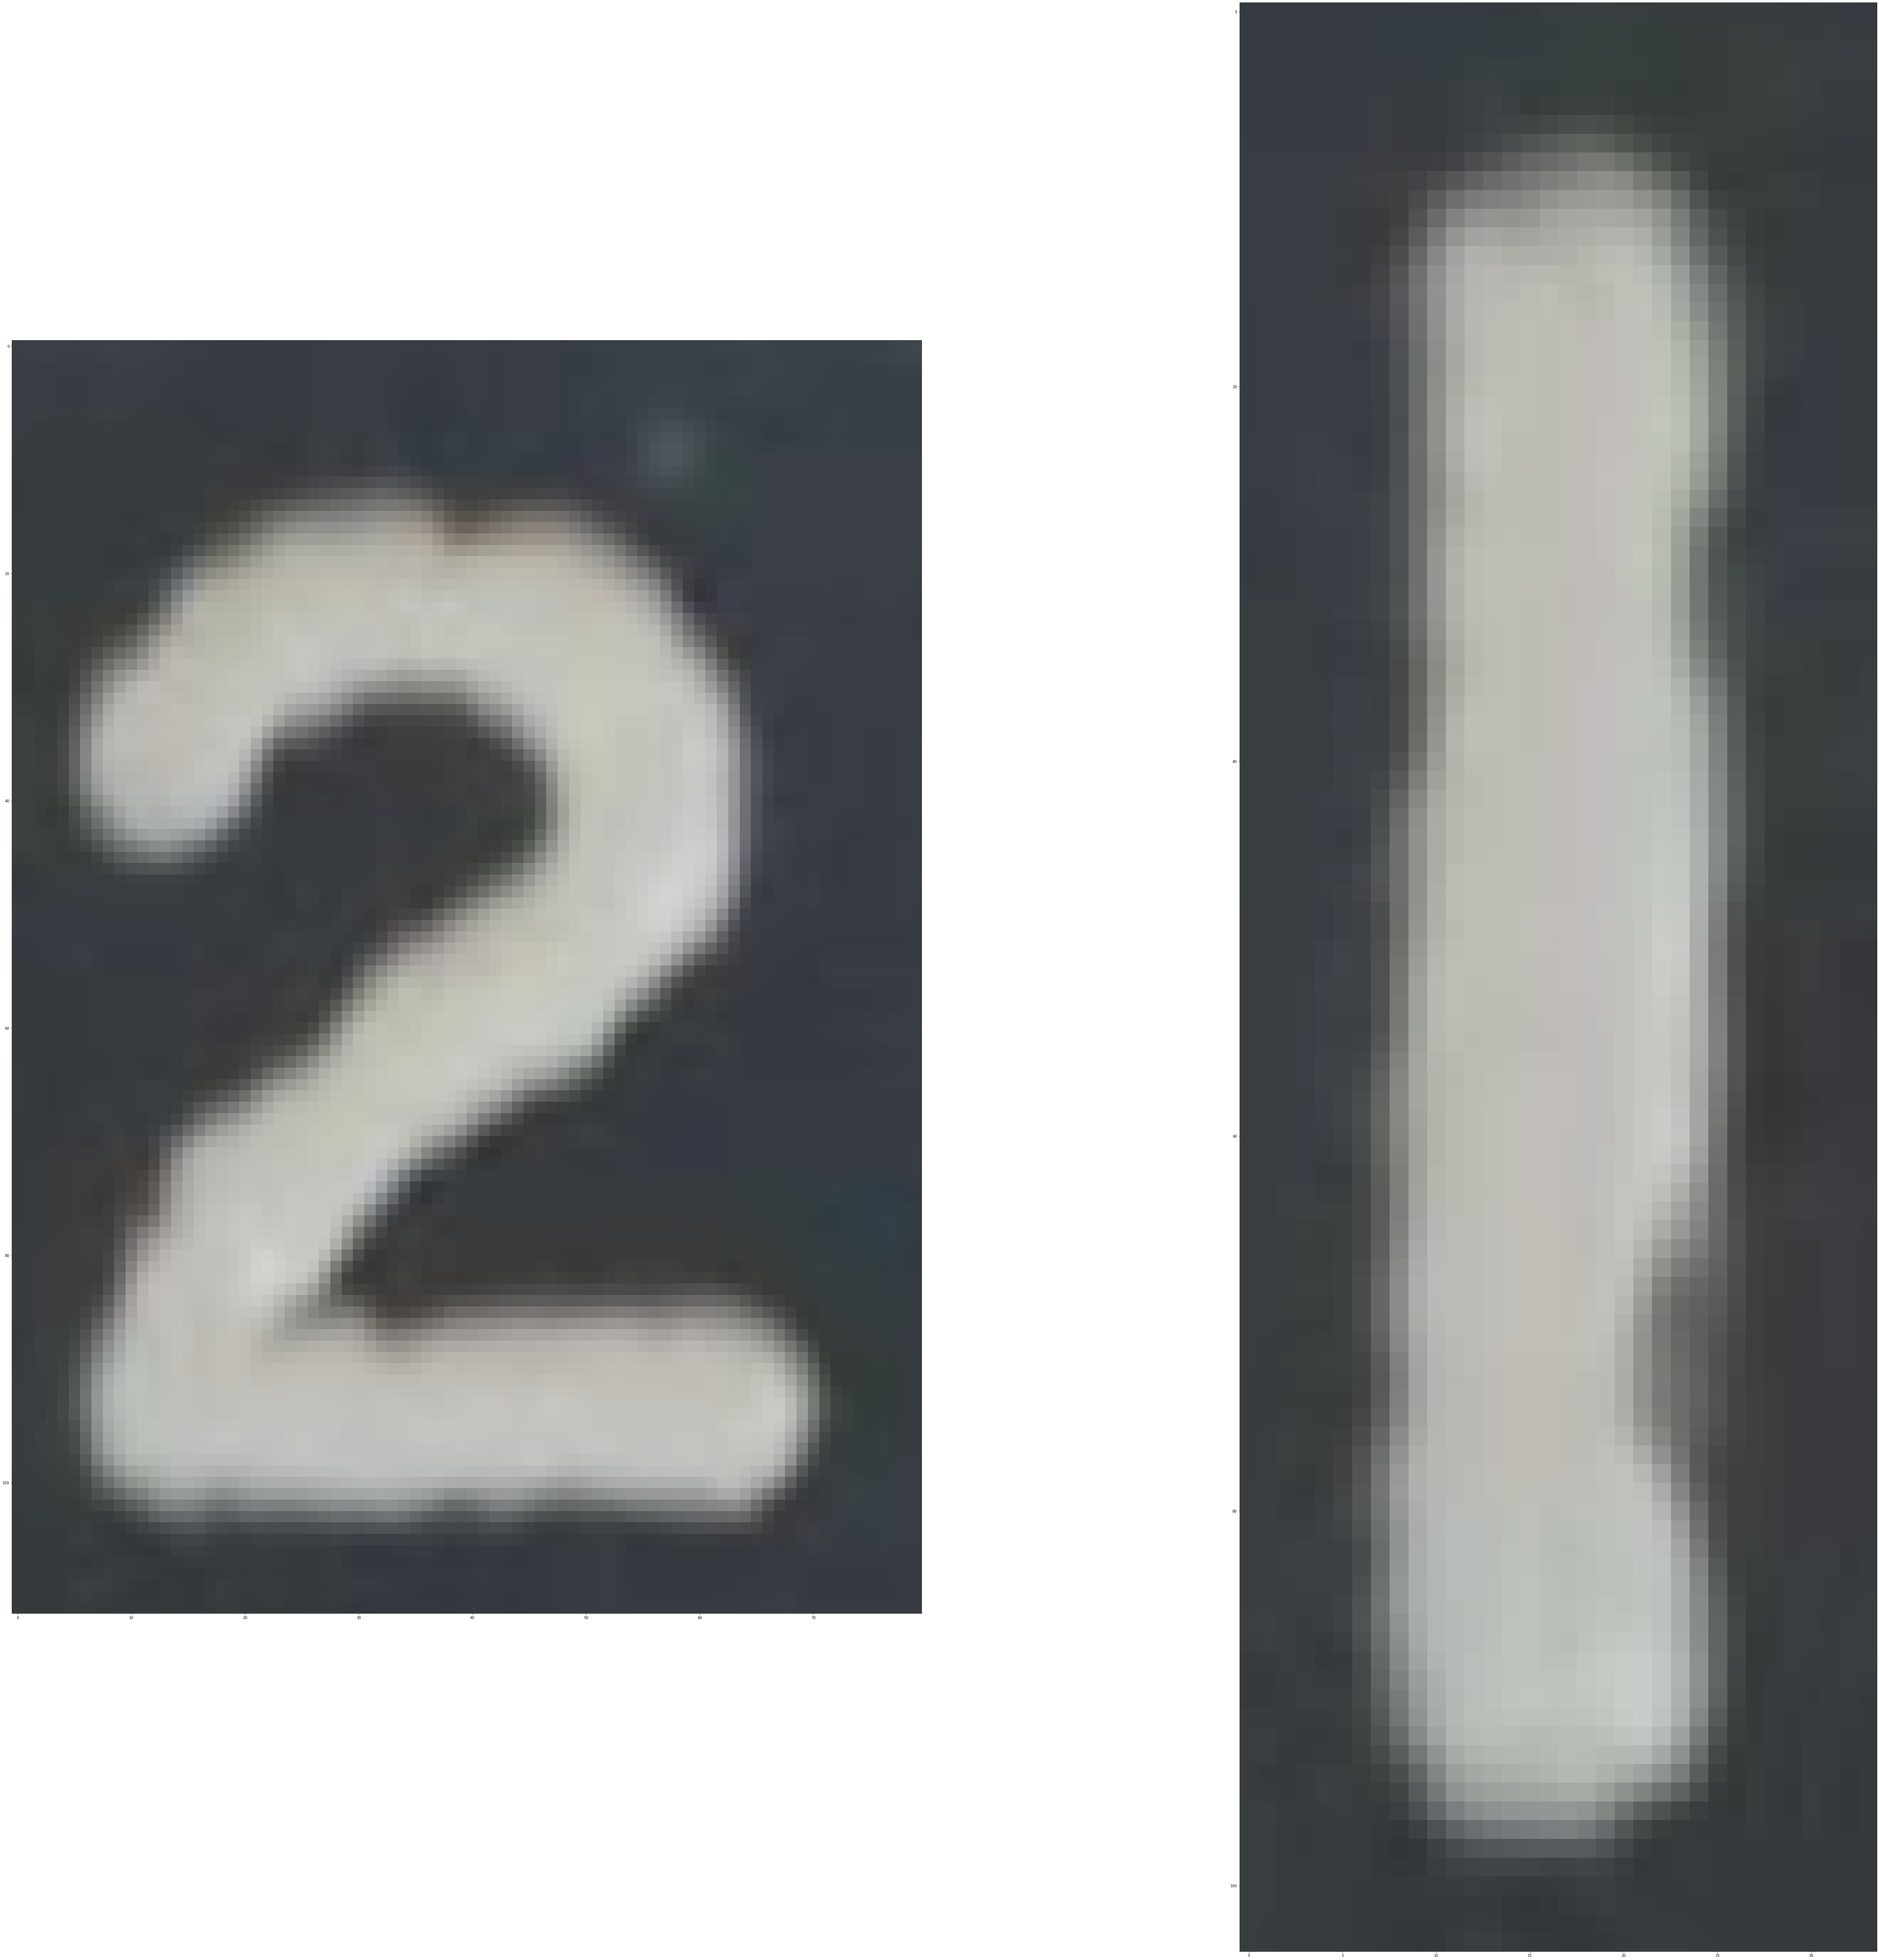

In [227]:
MinRectClosetContur = cv2.minAreaRect(closestContur)
MinRectSecondClosestContur =  cv2.minAreaRect(contoursWithoutDice[secondClosestCordIndex])
if debug == 1:
    print(MinRectClosetContur)
    print(MinRectSecondClosestContur)
angleDifreance = MinRectClosetContur[2]-MinRectSecondClosestContur[2]
if debug == 1:
    print(angleDifreance)
output = []
output.append(getSubImage(MinRectClosetContur,dieRaw))
if angleDifreance < 5 and angleDifreance > -5:
    output.append(getSubImage(MinRectSecondClosestContur,dieRaw))
output.append(getSubImage(MinRectSecondClosestContur,dieRaw))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,2,1),plt.imshow(output[0])
    plt.subplot(1,2,2),plt.imshow(output[1])

In [228]:
7**2

49

In [34]:
7*7

49

In [35]:
49**

0.00041649312786339027

In [36]:
from math import sqrt
sqrt(49)

7.0